# Importing the data and libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import shapiro,kstest,anderson,chisquare,expon
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('Movie_classification.csv')

# Exploracion de datos
## Encontrar los descriptores

In [4]:
df.describe()

Marketing expense  Production expense  Multiplex coverage  \
count         506.000000          506.000000          506.000000   
mean           92.270471           77.273557            0.445305   
std           172.030902           13.720706            0.115878   
min            20.126400           55.920000            0.129000   
25%            21.640900           65.380000            0.376000   
50%            25.130200           74.380000            0.462000   
75%            93.541650           91.200000            0.551000   
max          1799.524000          110.480000            0.615000   

             Budget  Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  \
count    506.000000    506.000000          506.000000           506.000000   
mean   34911.144022    142.074901            8.014002             8.185613   
std     3903.038232     28.148861            1.054266             1.054290   
min    19781.355000     76.400000            3.840000             4.035000   
25%    32693.952500    118.525000            7.316250             7.503750   
50%    34488.217500    151.000000            8.307500             8.495000   
75%    36793.542500    167.575000            8.865000             9.030000   
max    48772.900000    173.500000            9.435000             9.540000   

       Director_rating  Producer_rating  Critic_rating  Trailer_views  \
count       506.000000       506.000000     506.000000     506.000000   
mean          8.019664         8.190514       7.810870  449860.715415   
std           1.059899         1.049601       0.659699   68917.763145   
min           3.840000         4.030000       6.600000  212912.000000   
25%           7.296250         7.507500       7.200000  409128.000000   
50%           8.312500         8.465000       7.960000  462460.000000   
75%           8.883750         9.030000       8.260000  500247.500000   
max           9.425000         9.635000       9.400000  567784.000000   

       Time_taken  Twitter_hastags  Avg_age_actors  Num_multiplex  \
count  494.000000       506.000000      506.000000     506.000000   
mean   157.391498       260.832095       39.181818     545.043478   
std     31.295161       104.779133       12.513697     106.332889   
min      0.000000       201.152000        3.000000     333.000000   
25%    132.300000       223.796000       28.000000     465.000000   
50%    160.000000       254.400000       39.000000     535.500000   
75%    181.890000       283.416000       50.000000     614.750000   
max    217.520000      2022.400000       60.000000     868.000000   

          Collection  Start_Tech_Oscar  
count     506.000000        506.000000  
mean    45057.707510          0.545455  
std     18364.351764          0.498422  
min     10000.000000          0.000000  
25%     34050.000000          0.000000  
50%     42400.000000          1.000000  
75%     50000.000000          1.000000  
max    100000.000000          1.000000

## And the info

In [5]:
numerical_columns=columnas = [
    'Marketing expense', 'Production expense', 'Multiplex coverage', 'Budget',
    'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating', 'Director_rating',
    'Producer_rating', 'Critic_rating', 'Trailer_views','Time_taken',
    'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex', 'Collection', 
    'Start_Tech_Oscar'
]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Graficar las distribuciones

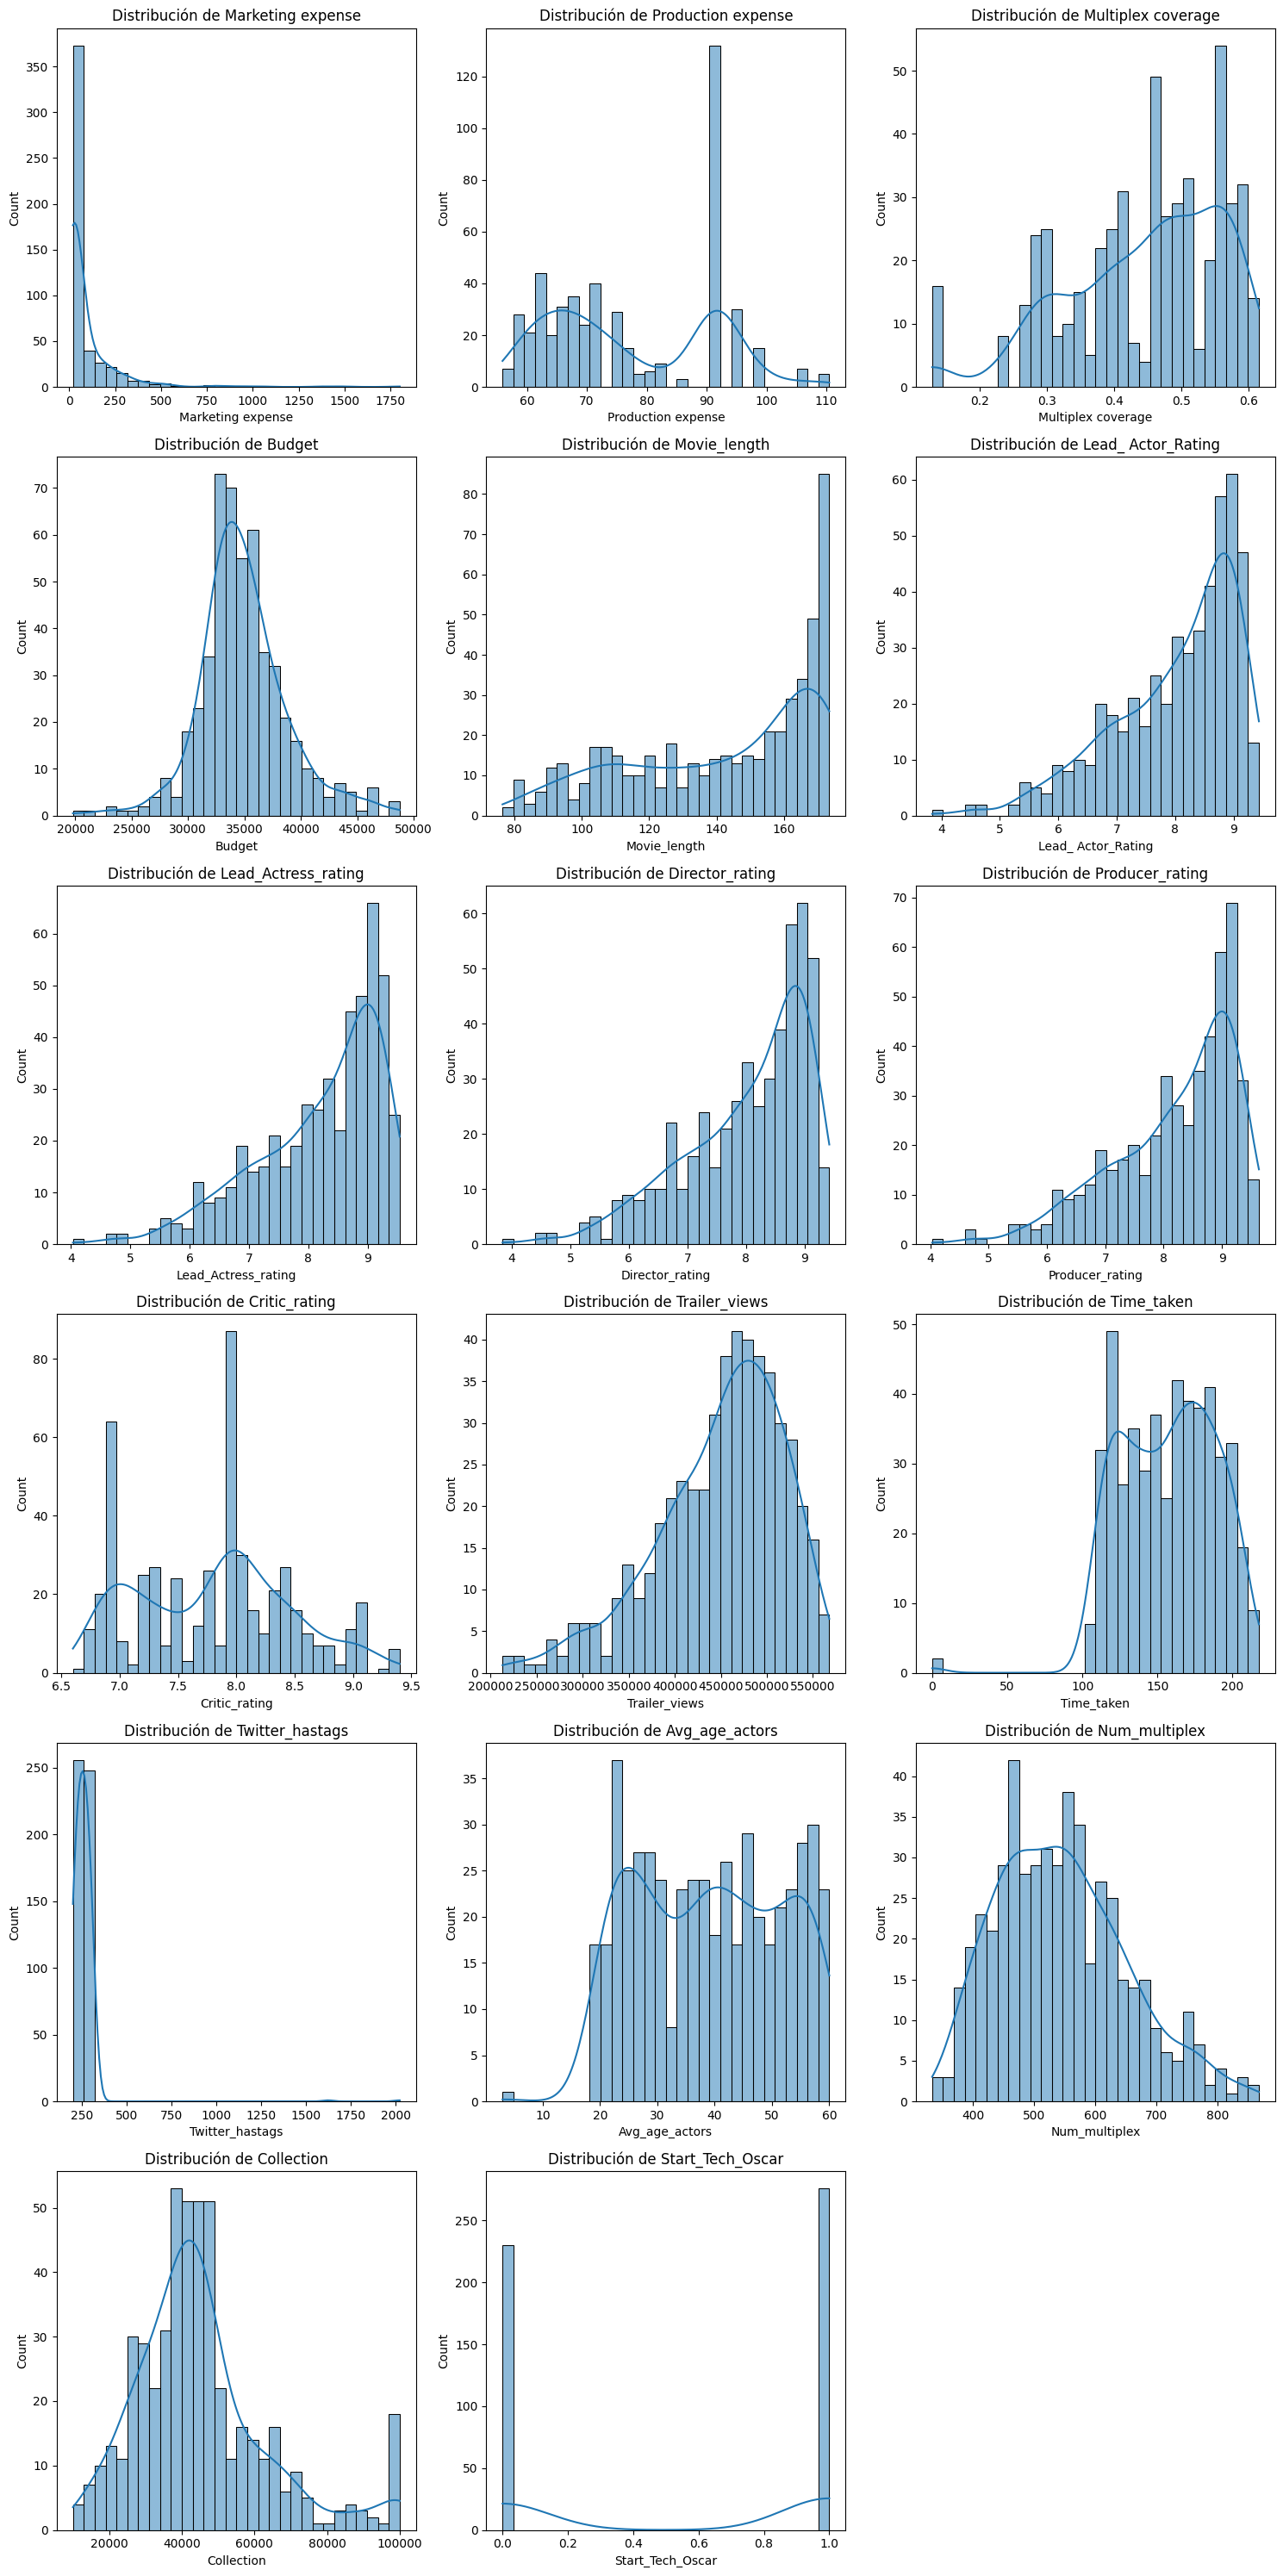

In [6]:
def plots(df):
    # Definir el tamaño de la cuadrícula
    n = len(numerical_columns)
    cols = 3  # Número de columnas por fila
    rows = math.ceil(n / cols)  # Calcular el número de filas

    # Crear la figura y los ejes
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    # Aplanar los ejes para iterar fácilmente si hay varias filas
    axes = axes.flatten()

    # Generar gráficos en cada subgráfico
    for i, col in enumerate(numerical_columns):
        sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')

    # Eliminar ejes sobrantes (si la cuadrícula es más grande que el número de gráficos)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()
plots(df)

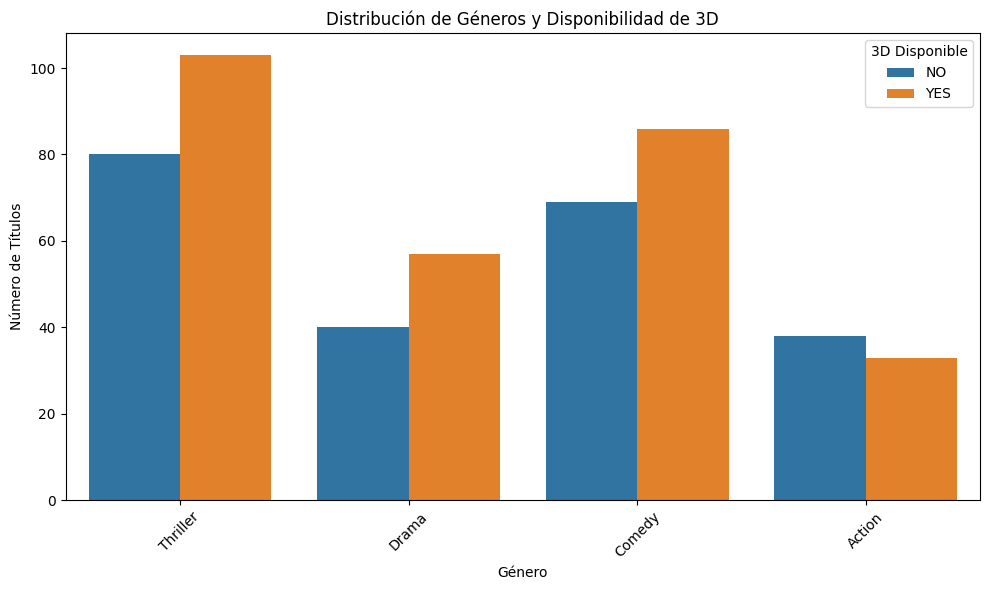

In [7]:
df['3D_available'] = df['3D_available'].astype('category')

# Crear un gráfico de conteo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', hue='3D_available')
plt.title('Distribución de Géneros y Disponibilidad de 3D')
plt.xlabel('Género')
plt.ylabel('Número de Títulos')
plt.legend(title='3D Disponible', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pruebas

In [8]:
for i in numerical_columns:
    stat, p = shapiro(df[i])
    print(f'columna: {i} Estadístico: {stat}, p-valor: {p}')
    if p > 0.05:
        print("Distribución normal")
    else:
        print("Distribución no normal")

columna: Marketing expense Estadístico: 0.44996478021132236, p-valor: 1.3285893795939306e-36
Distribución no normal
columna: Production expense Estadístico: 0.8997938834997925, p-valor: 1.0646987056818766e-17
Distribución no normal
columna: Multiplex coverage Estadístico: 0.9356359807798665, p-valor: 5.77622508493236e-14
Distribución no normal
columna: Budget Estadístico: 0.9608722575483458, p-valor: 2.411976537848809e-10
Distribución no normal
columna: Movie_length Estadístico: 0.8920133099611152, p-valor: 2.2307656987055583e-18
Distribución no normal
columna: Lead_ Actor_Rating Estadístico: 0.9047323843538205, p-valor: 3.006921614509896e-17
Distribución no normal
columna: Lead_Actress_rating Estadístico: 0.904856882688944, p-valor: 3.0881954405032454e-17
Distribución no normal
columna: Director_rating Estadístico: 0.904505216066114, p-valor: 2.8642810258157456e-17
Distribución no normal
columna: Producer_rating Estadístico: 0.9079025495924229, p-valor: 5.9774466573419e-17
Distribució

In [9]:

for i in numerical_columns:
    result = anderson(df[i])
    print(f'columna: {i} Estadístico: {stat}, p-valor: {p}')
    if p > 0.05:
        print("Distribución normal")
    else:
        print("Distribución no normal")

columna: Marketing expense Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Production expense Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Multiplex coverage Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Budget Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Movie_length Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Lead_ Actor_Rating Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Lead_Actress_rating Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Director_rating Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Distribución no normal
columna: Producer_rating Estadístico: 0.6335317040643557, p-valor: 1.9388636481779163e-31
Dis

# Limpieza


## Manejo de datos categoricos

### Columna de disponibilidad de peliculas en 3d

In [10]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['3D_available_encoded'] = label_enc.fit_transform(df['3D_available'])

# Ver la conversión (0 = 'NO', 1 = 'YES')

print(df[['3D_available', '3D_available_encoded']].head())

  3D_available  3D_available_encoded
0          YES                     1
1           NO                     0
2           NO                     0
3          YES                     1
4           NO                     0


### Columna para los generos

In [11]:

df = pd.get_dummies(df, columns=['Genre'])
print(df.head())
# Visualizar las nuevas c

   Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   
1            20.5462               69.14               0.531  35668.655   
2            20.5458               69.14               0.531  39912.675   
3            20.6474               59.36               0.542  38873.890   
4            21.3810               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  ...  Twitter_hastags Avg_age_actors  \
0           

## Datos faltantes

In [12]:
#Limpiar datos faltantes
tiempo=df['Time_taken']
df=df.drop('3D_available',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marketing expense     506 non-null    float64
 1   Production expense    506 non-null    float64
 2   Multiplex coverage    506 non-null    float64
 3   Budget                506 non-null    float64
 4   Movie_length          506 non-null    float64
 5   Lead_ Actor_Rating    506 non-null    float64
 6   Lead_Actress_rating   506 non-null    float64
 7   Director_rating       506 non-null    float64
 8   Producer_rating       506 non-null    float64
 9   Critic_rating         506 non-null    float64
 10  Trailer_views         506 non-null    int64  
 11  Time_taken            494 non-null    float64
 12  Twitter_hastags       506 non-null    float64
 13  Avg_age_actors        506 non-null    int64  
 14  Num_multiplex         506 non-null    int64  
 15  Collection            5

### Imputacion con Knn

In [13]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
# 3. Aplicar KNNImputer
df.replace("", pd.NA, inplace=True) 
imputer = KNNImputer(n_neighbors=5)


# 4. Reconstruir el DataFrame con los datos imputados
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 5. Verificar los resultados
print(df_imputed[['Time_taken']])

print(df_imputed.isna().sum())

     Time_taken
0        109.60
1        146.64
2        147.88
3        185.36
4        176.48
..          ...
501      186.96
502      132.24
503      109.56
504      158.80
505      205.60

[506 rows x 1 columns]
Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
Time_taken              0
Twitter_hastags         0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
3D_available_encoded    0
Genre_Action            0
Genre_Comedy            0
Genre_Drama             0
Genre_Thriller          0
dtype: int64


<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: Time_taken
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
None


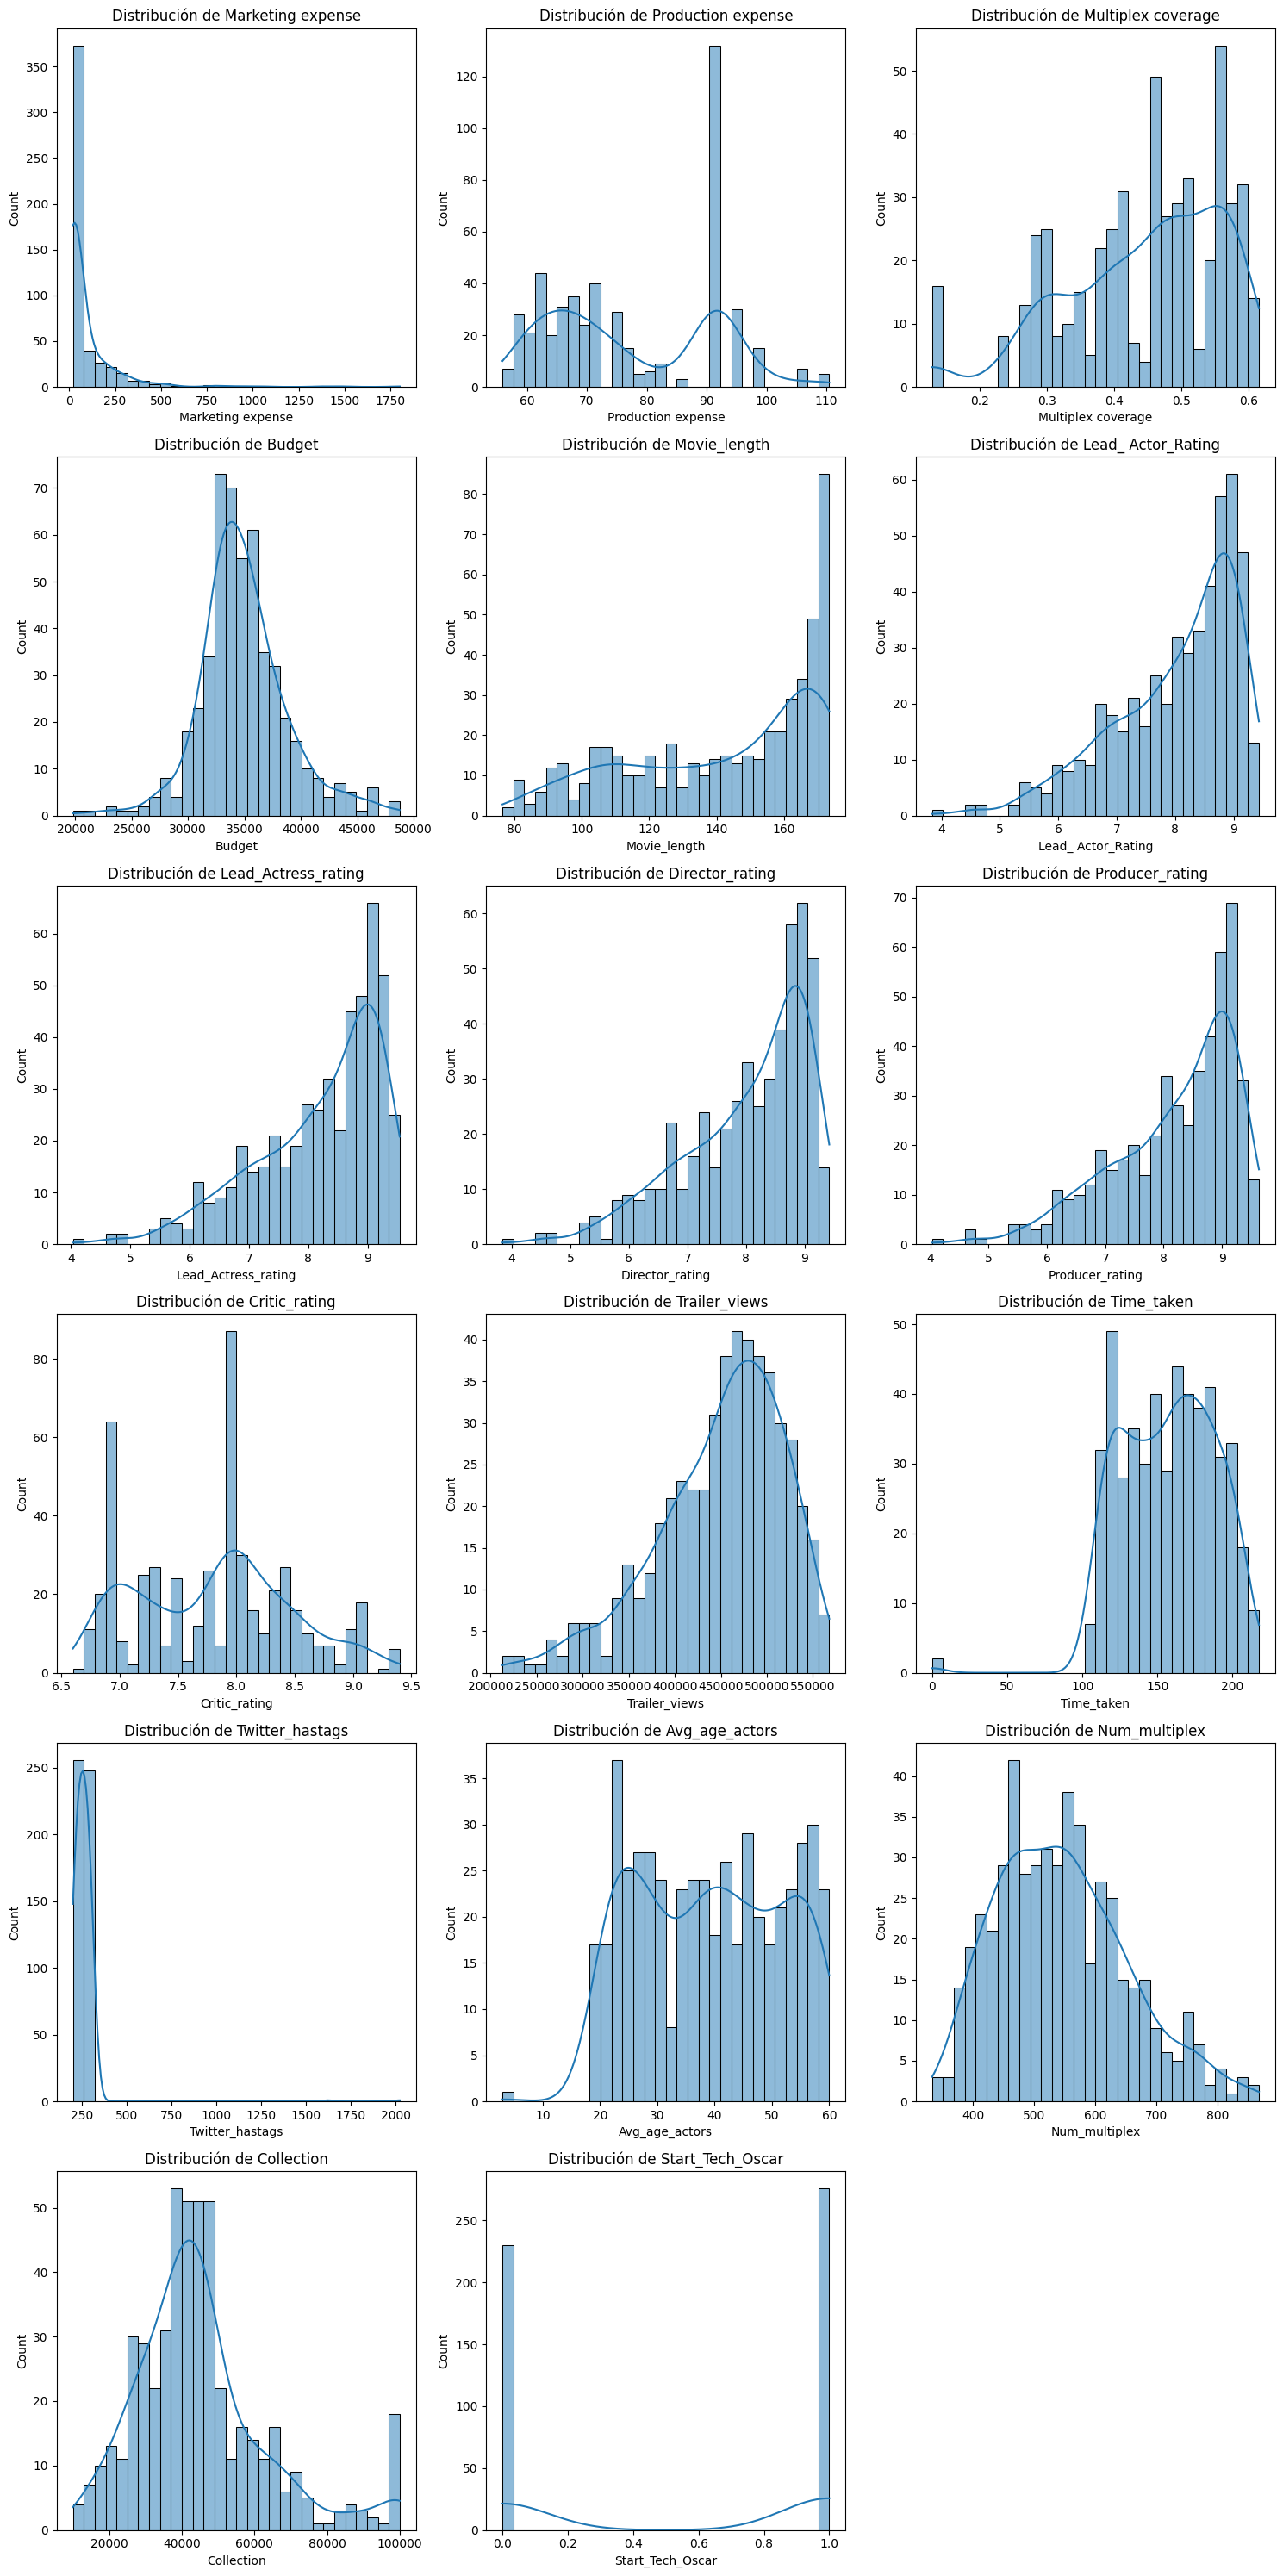

In [14]:
print(df_imputed['Time_taken'].info())
plots(df_imputed)

## Outliers

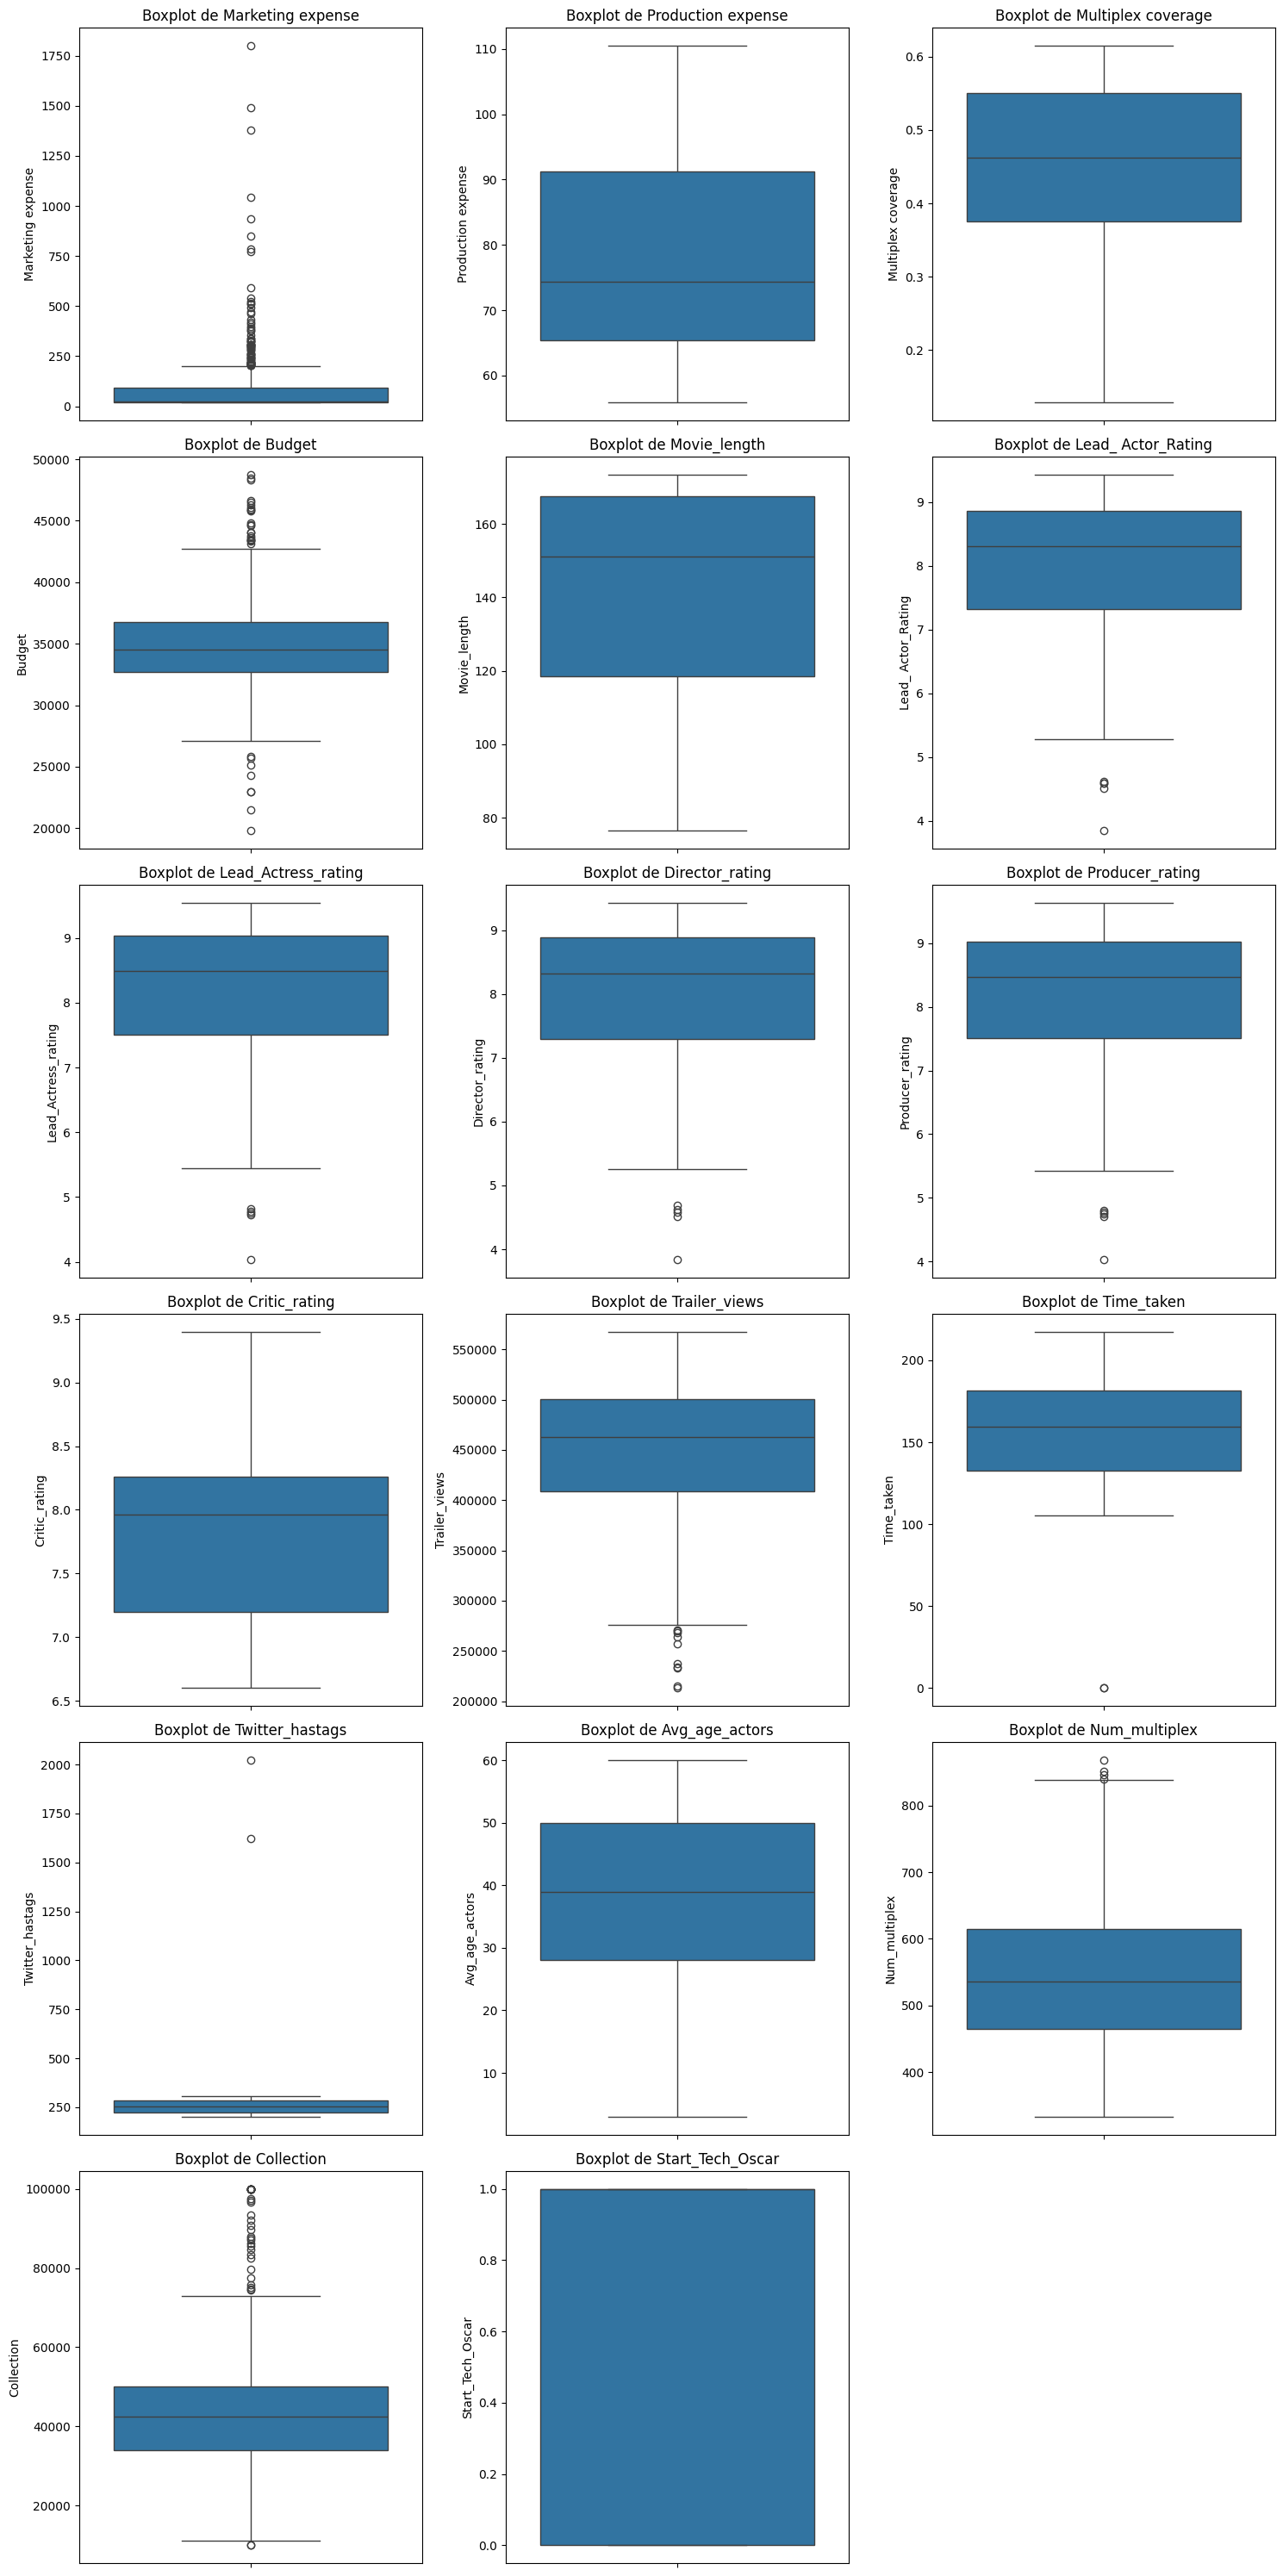

In [15]:
def plots_box(df):
    n = len(numerical_columns)
    cols = 3  # Número de columnas por fila
    rows = math.ceil(n / cols)  # Calcular el número de filas

    # Crear la figura y los ejes
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    # Aplanar los ejes para iterar fácilmente si hay varias filas
    axes = axes.flatten()

    # Generar gráficos de boxplot en cada subgráfico
    for i, col in enumerate(numerical_columns):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}')

    # Eliminar ejes sobrantes (si la cuadrícula es más grande que el número de gráficos)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el diseño
    plt.tight_layout()
    plt.show()
plots_box(df_imputed)

In [16]:
def statistical(df):
    numerical_columns = df_imputed.select_dtypes(include=['float64', 'int64']).columns

    # Crear un diccionario para almacenar las estadísticas
    statistics = {}

    for col in numerical_columns:
        statistics[col] = {
            'Media': df[col].mean(),
            'Mediana': df[col].median(),
            'Moda': df[col].mode()[0],  # Obtiene el primer valor de la moda
            'Skewness': df[col].skew(),
            'Curtosis': df[col].kurtosis(),
            'Varianza': df[col].var(),
            'Desviación estándar': df[col].std()
        }

    # Convertir el diccionario en un DataFrame
    stats_df = pd.DataFrame(statistics).T
    return stats_df
print(statistical(df_imputed))

                              Media      Mediana         Moda   Skewness  \
Marketing expense         92.270471      25.1302      20.3002   5.223149   
Production expense        77.273557      74.3800      91.2000   0.295022   
Multiplex coverage         0.445305       0.4620       0.4620  -0.729308   
Budget                 34911.144022   34488.2175   31735.7150   0.403612   
Movie_length             142.074901     151.0000     173.5000  -0.598963   
Lead_ Actor_Rating         8.014002       8.3075       9.0200  -1.010577   
Lead_Actress_rating        8.185613       8.4950       9.2300  -1.007492   
Director_rating            8.019664       8.3125       8.8150  -1.003848   
Producer_rating            8.190514       8.4650       9.0950  -1.004680   
Critic_rating              7.810870       7.9600       7.9600   0.176139   
Trailer_views         449860.715415  462460.0000  474433.0000  -0.843831   
Time_taken               157.267304     159.7200     119.3600  -0.467046   
Twitter_hast

In [17]:
df.replace("", pd.NA, inplace=True)

# Obtener descripción estadística
print(df['Time_taken'].describe())

# Contar valores nulos
num_na = df['Time_taken'].isna().sum()
print(f"Número de valores nulos en 'Time_taken': {num_na}")

count    494.000000
mean     157.391498
std       31.295161
min        0.000000
25%      132.300000
50%      160.000000
75%      181.890000
max      217.520000
Name: Time_taken, dtype: float64
Número de valores nulos en 'Time_taken': 12


### Pruebas individuales por columna

#### Marketing expense

In [18]:
print(df['Marketing expense'].describe())

count     506.000000
mean       92.270471
std       172.030902
min        20.126400
25%        21.640900
50%        25.130200
75%        93.541650
max      1799.524000
Name: Marketing expense, dtype: float64


##### Purbeas con varios tipos de transformaciones

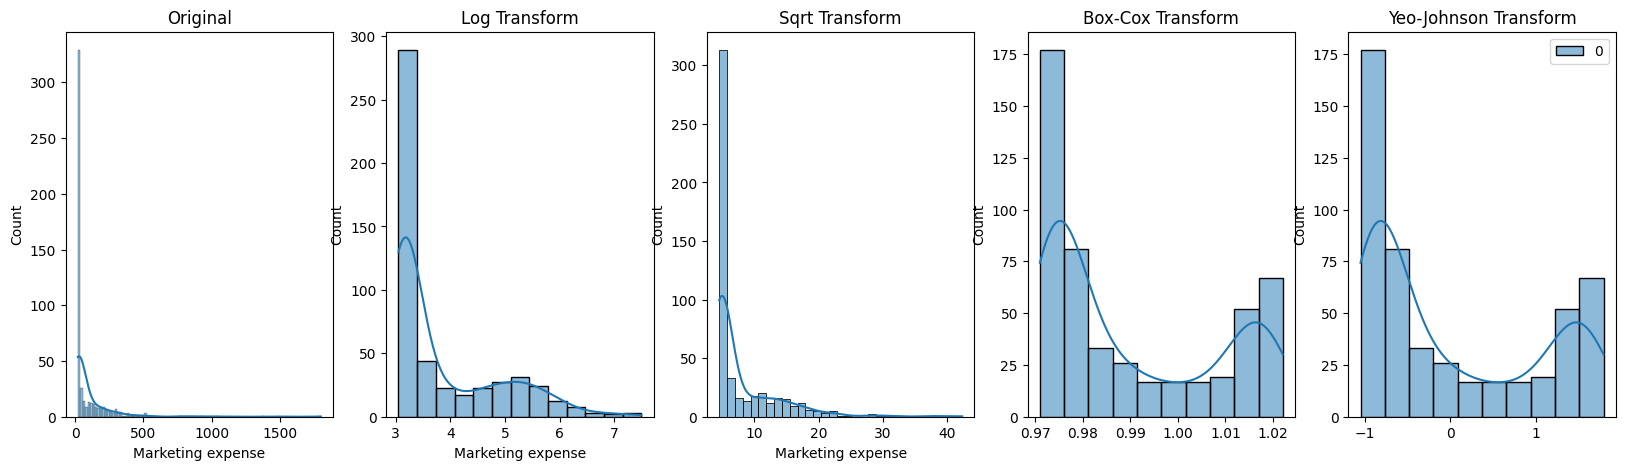

Shapiro (Original): ShapiroResult(statistic=0.44996478021132236, pvalue=1.3285893795939306e-36)
Shapiro (Log): ShapiroResult(statistic=0.7626780848877028, pvalue=2.2788205032724824e-26)
Shapiro (Sqrt): ShapiroResult(statistic=0.6560002393064992, pvalue=1.1353838659056268e-30)
Shapiro (Box-Cox): ShapiroResult(statistic=0.8167301262816247, pvalue=1.4144391382415159e-23)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.8167301259149784, pvalue=1.414439069930062e-23)


In [19]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
box_cox_transformed, _ = boxcox(df['Marketing expense'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Marketing expense'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Marketing expense'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Marketing expense']])

# Visualización
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

sns.histplot(df['Marketing expense'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Marketing expense']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))


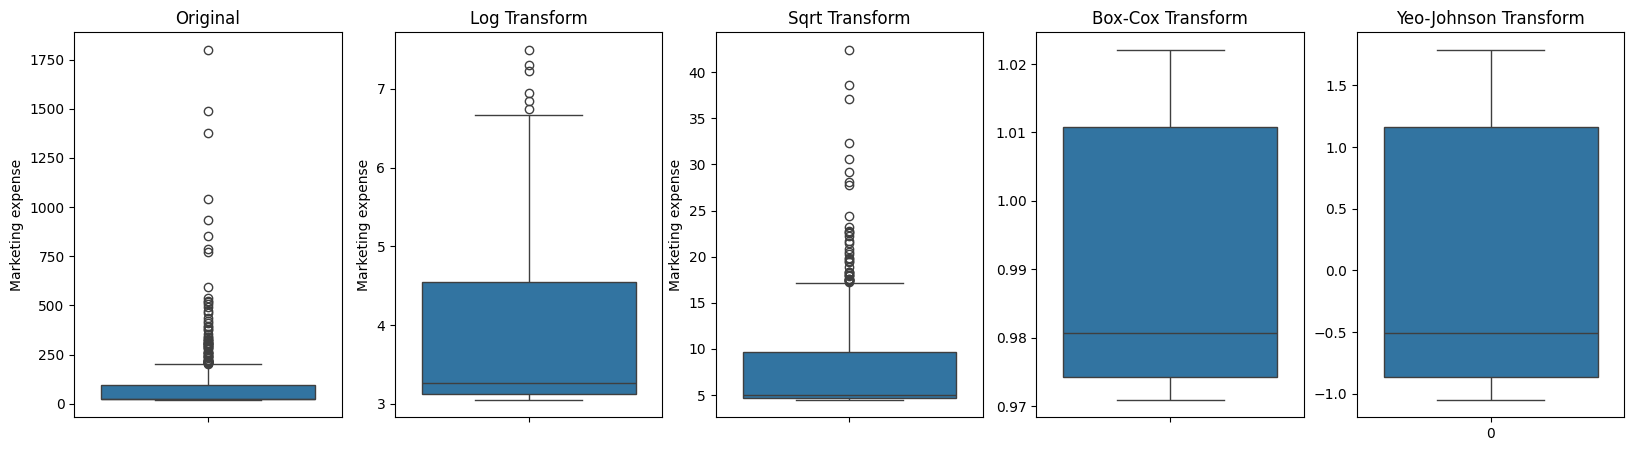

In [20]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
sns.boxplot(df['Marketing expense'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

plt.show()


In [21]:
df_transformed = df.copy()
df_transformed['Marketing expense']=box_cox_transformed
df_transformed.head()

Marketing expense  Production expense  Multiplex coverage     Budget  \
0           0.970945               59.62               0.462  36524.125   
1           0.971932               69.14               0.531  35668.655   
2           0.971931               69.14               0.531  39912.675   
3           0.972164               59.36               0.542  38873.890   
4           0.973786               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  ...  Twitter_hastags  Avg_age_actors  \
0            7.995           7.94  ...          223.840              23   
1            7.470           7.44  ...          243.456              42   
2            7.515           7.44  ...         2022.400              38   
3            7.020           8.26  ...          225.344              45   
4            7.070           8.26  ...          225.792              55   

   Num_multiplex  Collection  Start_Tech_Oscar  3D_available_encoded  \
0            494       48000                 1                     1   
1            462       43200                 0                     0   
2            458       69400                 1                     0   
3            472       66800                 1                     1   
4            395       72400                 1                     0   

   Genre_Action  Genre_Comedy  Genre_Drama  Genre_Thriller  
0         False         False        False            True  
1         False         False         True           False  
2         False          True        False           False  
3         False         False         True           False  
4         False         False         True           False  

[5 rows x 22 columns]

#### Budget

count      506.000000
mean     34911.144022
std       3903.038232
min      19781.355000
25%      32693.952500
50%      34488.217500
75%      36793.542500
max      48772.900000
Name: Budget, dtype: float64


<Axes: ylabel='Budget'>

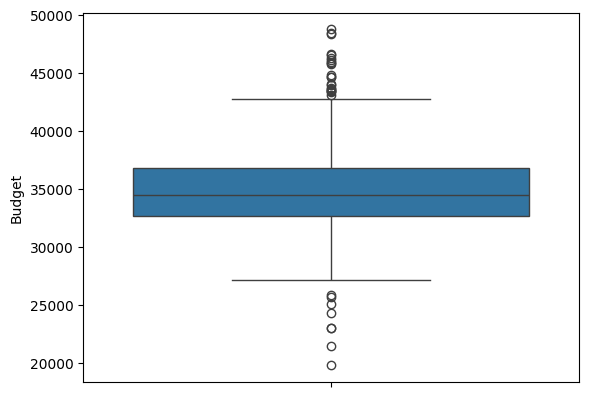

In [22]:
print(df['Budget'].describe())
sns.boxplot(df['Budget'])


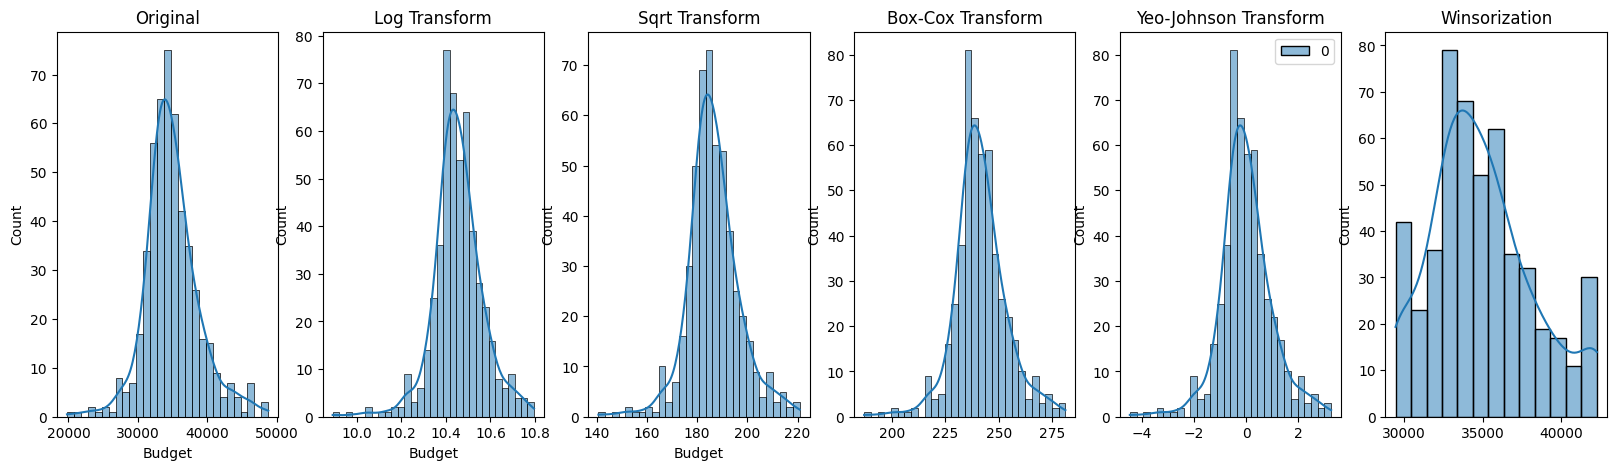

Shapiro (Original): ShapiroResult(statistic=0.9608722575483458, pvalue=2.411976537848809e-10)
Shapiro (Log): ShapiroResult(statistic=0.959397784645484, pvalue=1.3622534755450565e-10)
Shapiro (Sqrt): ShapiroResult(statistic=0.9640562336243296, pvalue=8.689187691967834e-10)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9639574370329266, pvalue=8.341712666933213e-10)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9639574373117616, pvalue=8.341713626924647e-10)
Shapiro (Winsorization): ShapiroResult(statistic=0.9626273671947068, pvalue=4.847622957970245e-10)


In [23]:

from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Budget'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Budget'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Budget'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Budget']])

winsorized_budget = winsorize(df_transformed['Budget'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Budget'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Budget']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

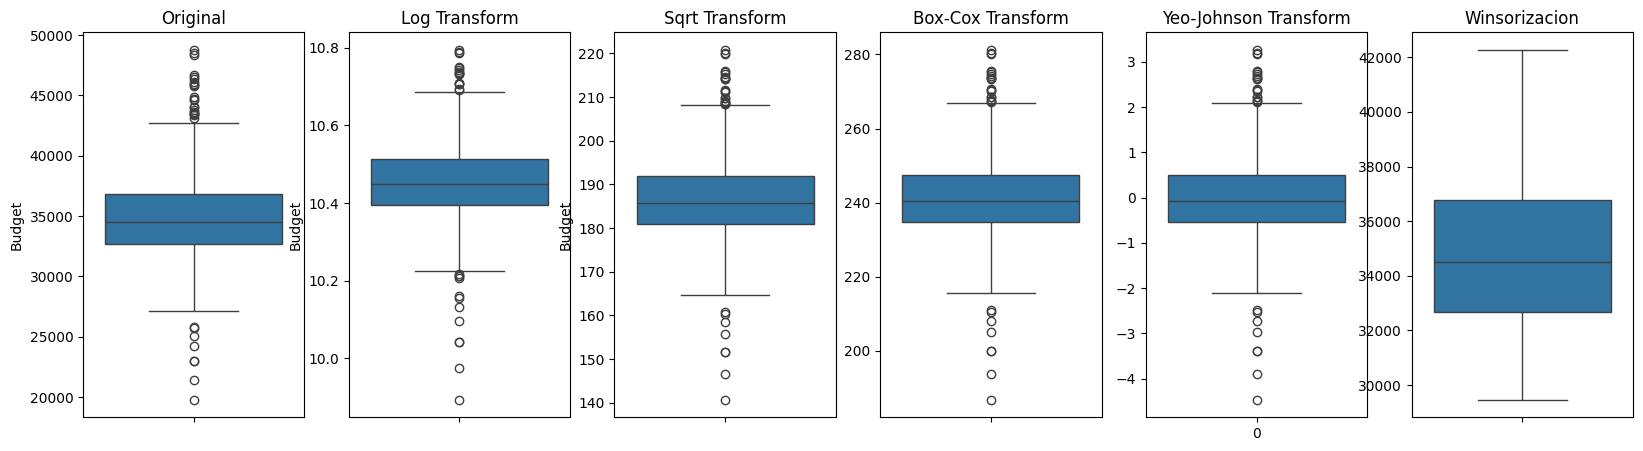

In [24]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Budget'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')

plt.show()

In [25]:
df_transformed['Budget']=winsorized_budget

#### Lead_actor rating

count    506.000000
mean       8.014002
std        1.054266
min        3.840000
25%        7.316250
50%        8.307500
75%        8.865000
max        9.435000
Name: Lead_ Actor_Rating, dtype: float64


<Axes: ylabel='Lead_ Actor_Rating'>

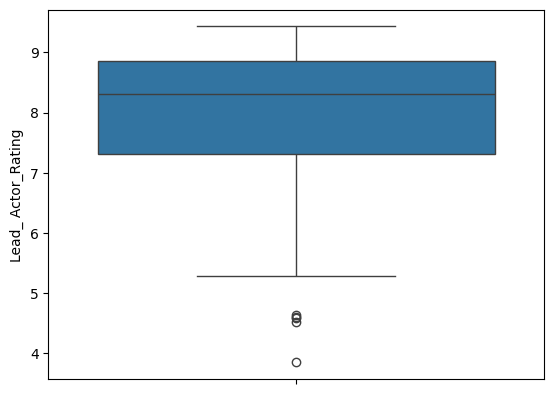

In [26]:
print(df['Lead_ Actor_Rating'].describe())
sns.boxplot(df['Lead_ Actor_Rating'])

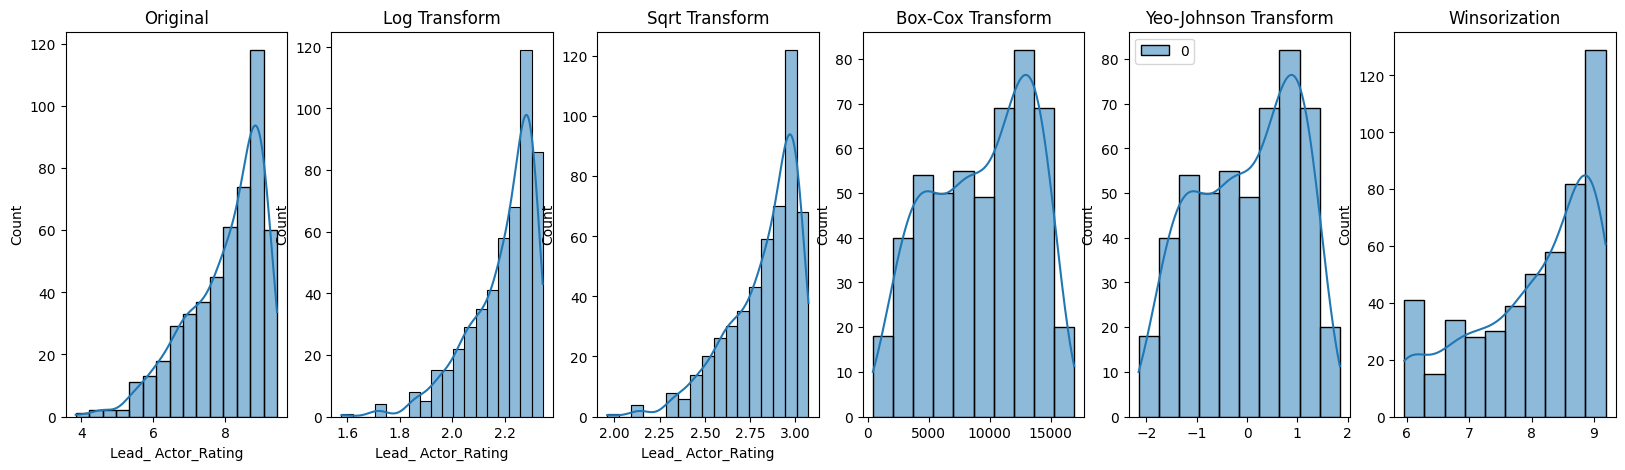

Shapiro (Original): ShapiroResult(statistic=0.9047323843538205, pvalue=3.006921614509896e-17)
Shapiro (Log): ShapiroResult(statistic=0.8710530730956595, pvalue=4.816546645145924e-20)
Shapiro (Sqrt): ShapiroResult(statistic=0.8871172800030107, pvalue=8.697829210697556e-19)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9525570527422067, pvalue=1.1297635449740197e-11)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9525570531399337, pvalue=1.1297637005944009e-11)
Shapiro (Winsorization): ShapiroResult(statistic=0.8985765148315465, pvalue=8.290028231487829e-18)


In [27]:

from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Lead_ Actor_Rating'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Lead_ Actor_Rating'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Lead_ Actor_Rating'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Lead_ Actor_Rating']])

winsorized_budget = winsorize(df_transformed['Lead_ Actor_Rating'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Lead_ Actor_Rating'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Lead_ Actor_Rating']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

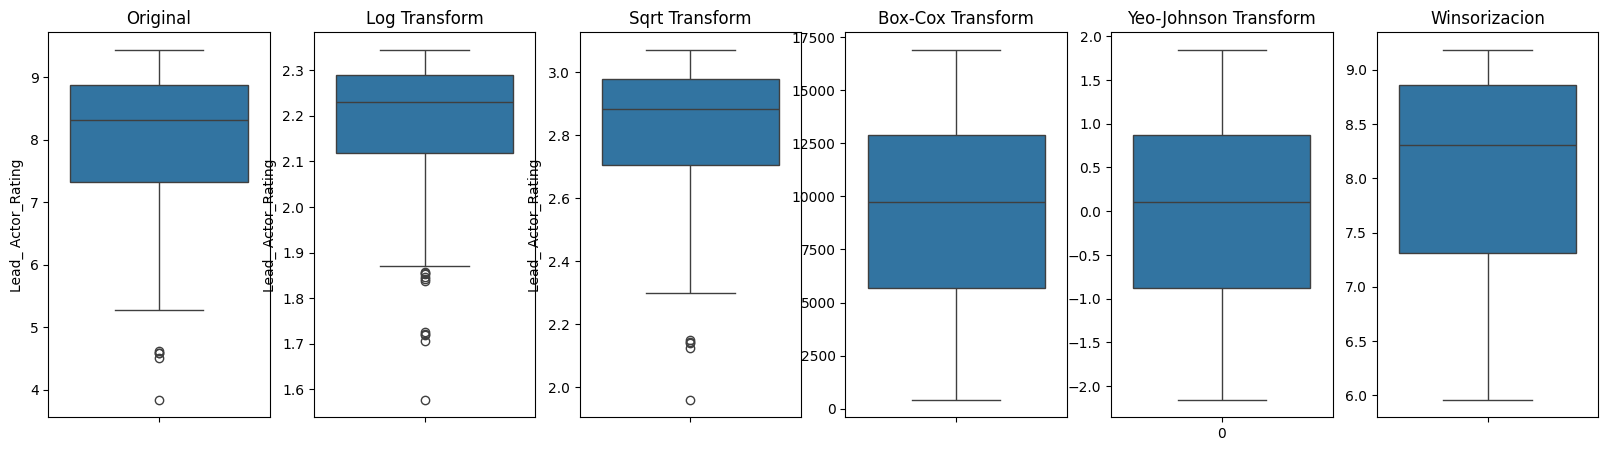

In [28]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Lead_ Actor_Rating'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')


In [29]:
df_transformed['Lead_ Actor_Rating']=box_cox_transformed

#### Lead actress rating

count    506.000000
mean       8.185613
std        1.054290
min        4.035000
25%        7.503750
50%        8.495000
75%        9.030000
max        9.540000
Name: Lead_Actress_rating, dtype: float64


<Axes: ylabel='Lead_Actress_rating'>

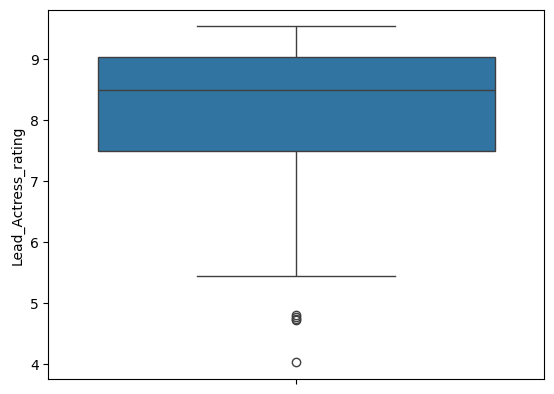

In [30]:
print(df['Lead_Actress_rating'].describe())
sns.boxplot(df['Lead_Actress_rating'])

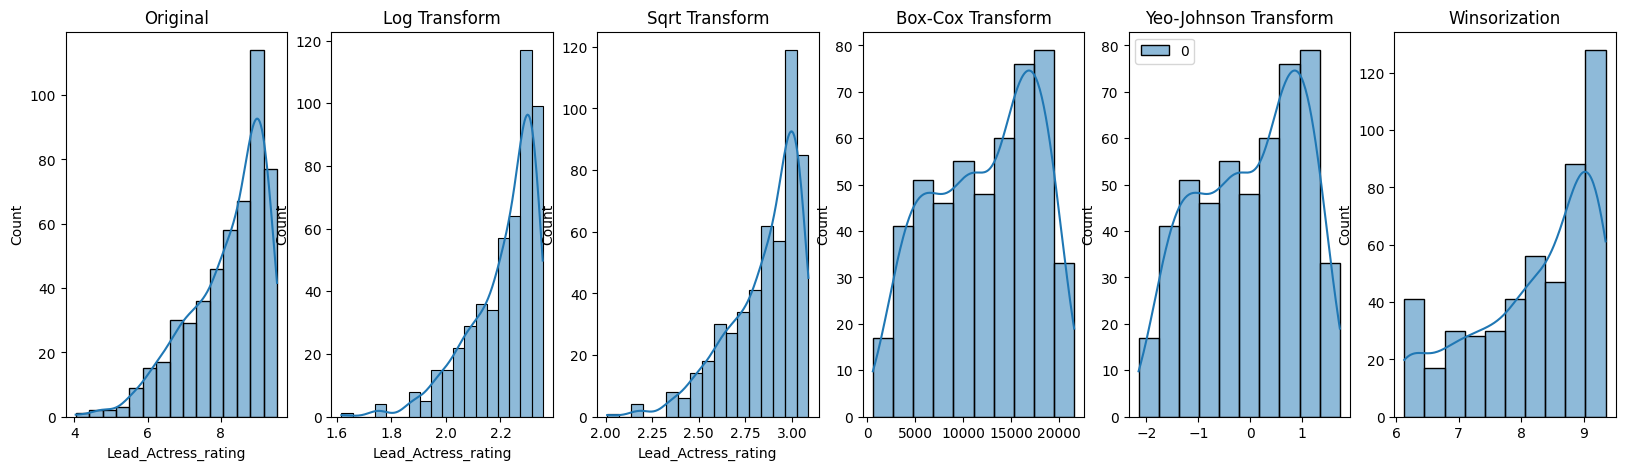

Shapiro (Original): ShapiroResult(statistic=0.904856882688944, pvalue=3.0881954405032454e-17)
Shapiro (Log): ShapiroResult(statistic=0.8723222027722849, pvalue=5.993344035064555e-20)
Shapiro (Sqrt): ShapiroResult(statistic=0.8878427609862092, pvalue=9.98141627223847e-19)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9531338013078547, pvalue=1.3806513252184636e-11)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9531337998696208, pvalue=1.380650631980324e-11)
Shapiro (Winsorization): ShapiroResult(statistic=0.8969692456171662, pvalue=5.977492925370054e-18)


In [31]:

from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Lead_Actress_rating'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Lead_Actress_rating'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Lead_Actress_rating'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Lead_Actress_rating']])

winsorized_budget = winsorize(df_transformed['Lead_Actress_rating'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Lead_Actress_rating'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Lead_Actress_rating']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

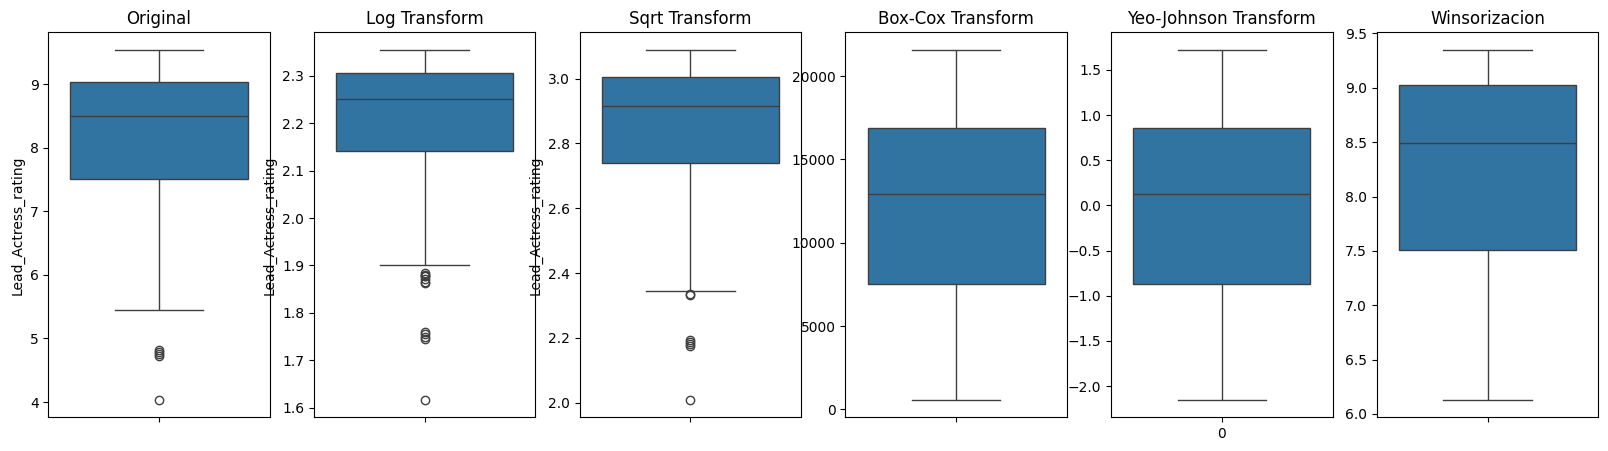

In [32]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Lead_Actress_rating'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')


In [33]:
df_transformed['Lead_Actress_rating']=box_cox_transformed

#### Director rating

count    506.000000
mean       8.019664
std        1.059899
min        3.840000
25%        7.296250
50%        8.312500
75%        8.883750
max        9.425000
Name: Director_rating, dtype: float64


<Axes: ylabel='Director_rating'>

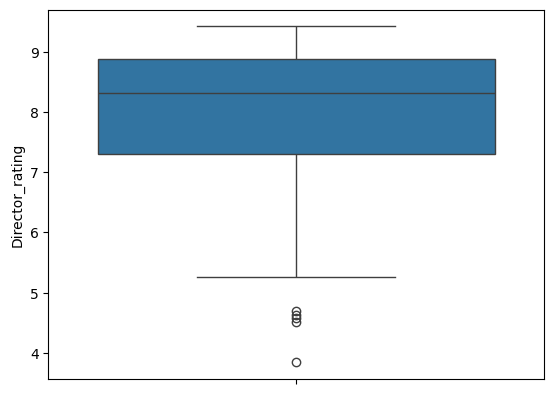

In [34]:
print(df['Director_rating'].describe())
sns.boxplot(df['Director_rating'])

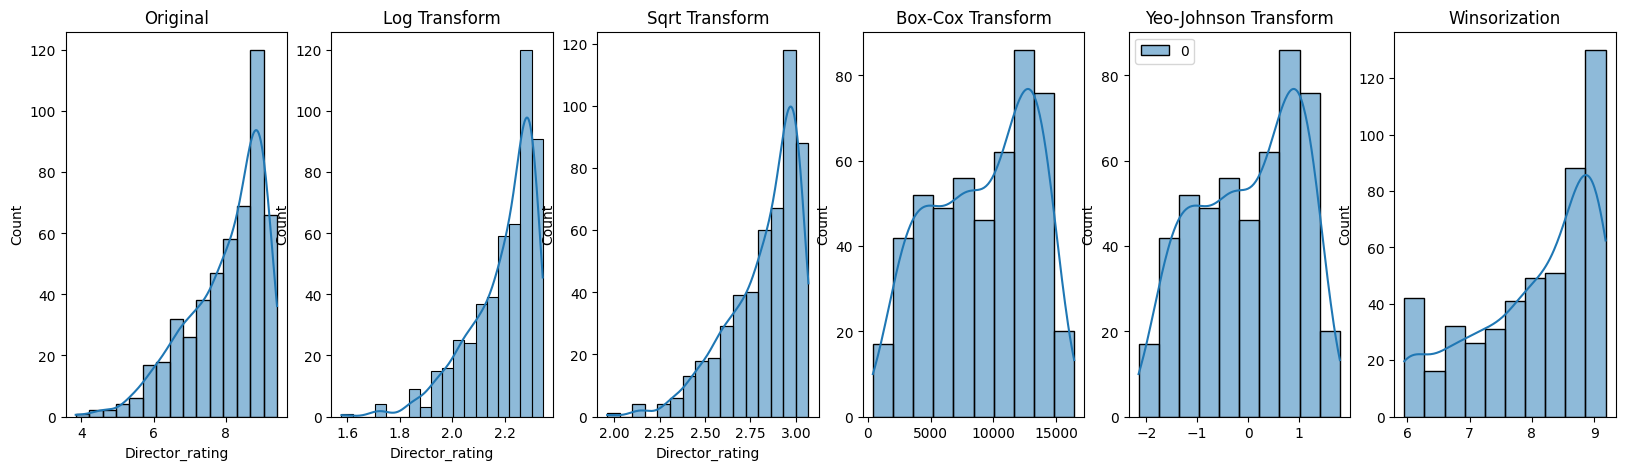

Shapiro (Original): ShapiroResult(statistic=0.904856882688944, pvalue=3.0881954405032454e-17)
Shapiro (Log): ShapiroResult(statistic=0.8712906764512705, pvalue=5.0171387683220146e-20)
Shapiro (Sqrt): ShapiroResult(statistic=0.8871338259091791, pvalue=8.725114923644537e-19)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9519161774974247, pvalue=9.057675673897799e-12)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9519161777986151, pvalue=9.057676610447393e-12)
Shapiro (Winsorization): ShapiroResult(statistic=0.8962387228911275, pvalue=5.158136251478072e-18)


In [35]:

from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Director_rating'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Director_rating'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Director_rating'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Director_rating']])

winsorized_budget = winsorize(df_transformed['Director_rating'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Director_rating'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Lead_Actress_rating']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

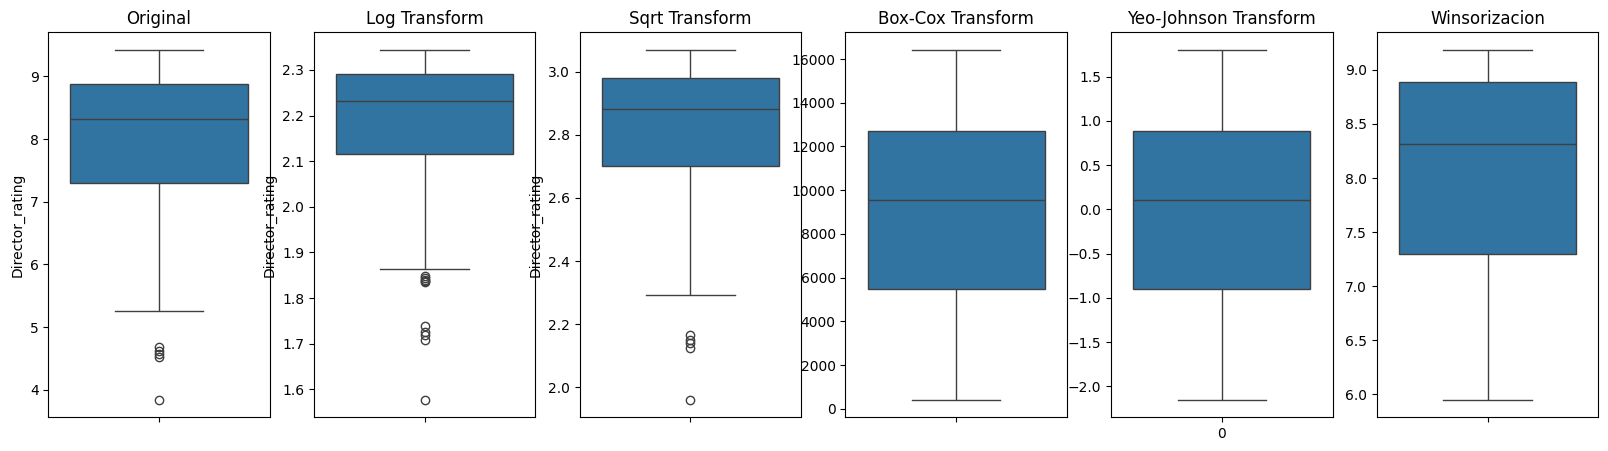

In [36]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Director_rating'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')

In [37]:
df_transformed['Director_rating']=box_cox_transformed

#### Producer rating

count    506.000000
mean       8.190514
std        1.049601
min        4.030000
25%        7.507500
50%        8.465000
75%        9.030000
max        9.635000
Name: Producer_rating, dtype: float64


<Axes: ylabel='Producer_rating'>

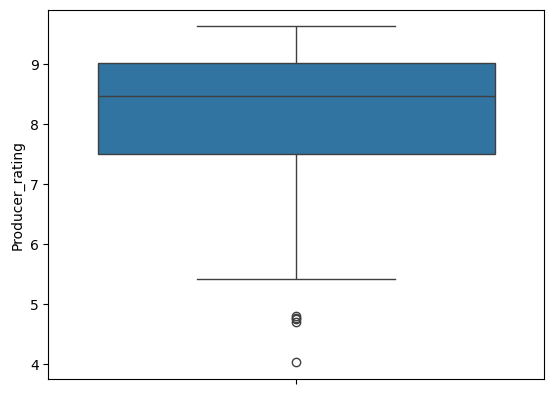

In [38]:
print(df['Producer_rating'].describe())
sns.boxplot(df['Producer_rating'])

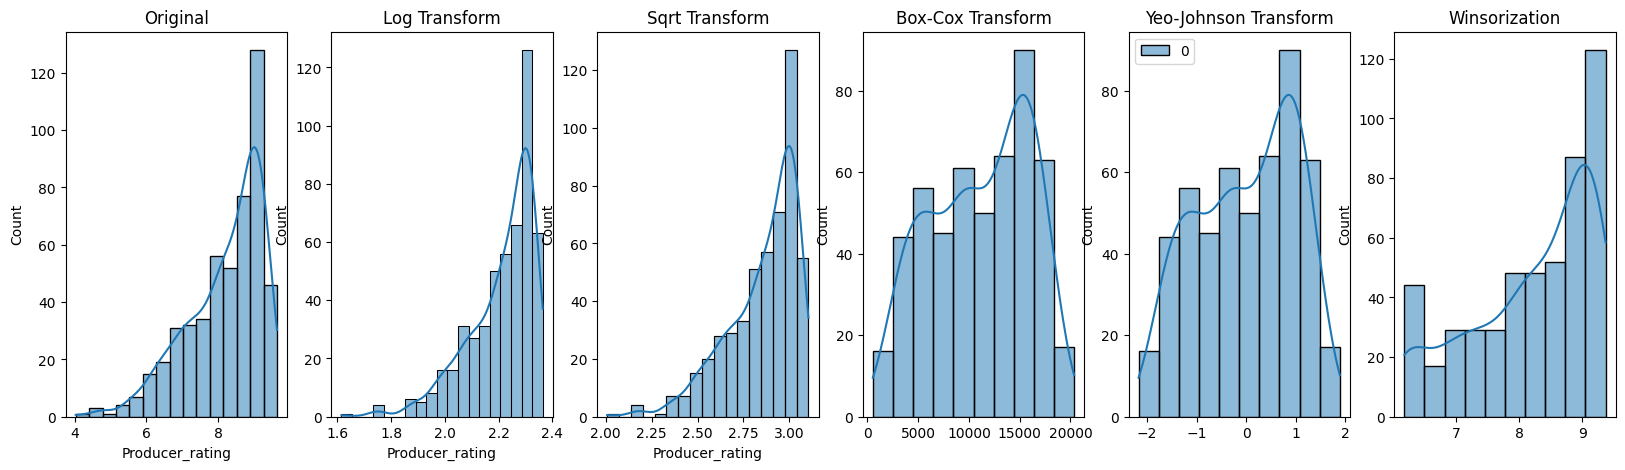

Shapiro (Original): ShapiroResult(statistic=0.9079025495924229, pvalue=5.9774466573419e-17)
Shapiro (Log): ShapiroResult(statistic=0.8747472918626152, pvalue=9.141808723015268e-20)
Shapiro (Sqrt): ShapiroResult(statistic=0.8905769929485262, pvalue=1.6868425756168686e-18)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9566736995199253, pvalue=4.904116834088912e-11)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9566736987014093, pvalue=4.904115359436674e-11)
Shapiro (Winsorization): ShapiroResult(statistic=0.8990514194539775, pvalue=9.137686711215036e-18)


In [39]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Producer_rating'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Producer_rating'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Producer_rating'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Producer_rating']])

winsorized_budget = winsorize(df_transformed['Producer_rating'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Producer_rating'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Producer_rating']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

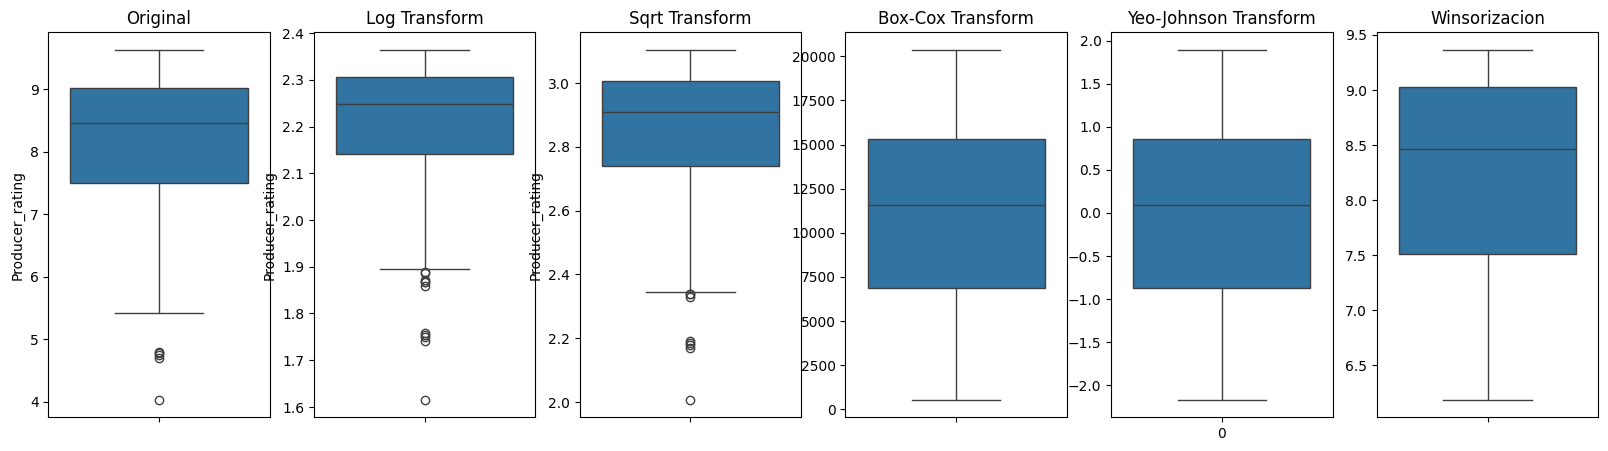

In [40]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Producer_rating'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')

In [41]:
df_transformed['Producer_rating']=box_cox_transformed

####  Trailer views

count       506.000000
mean     449860.715415
std       68917.763145
min      212912.000000
25%      409128.000000
50%      462460.000000
75%      500247.500000
max      567784.000000
Name: Trailer_views, dtype: float64


<Axes: ylabel='Trailer_views'>

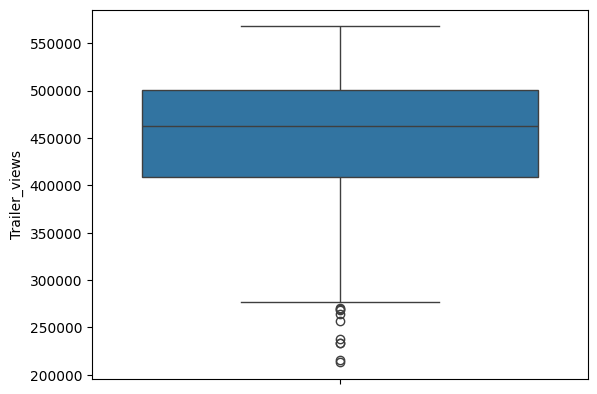

In [42]:
print(df['Trailer_views'].describe())
sns.boxplot(df['Trailer_views'])

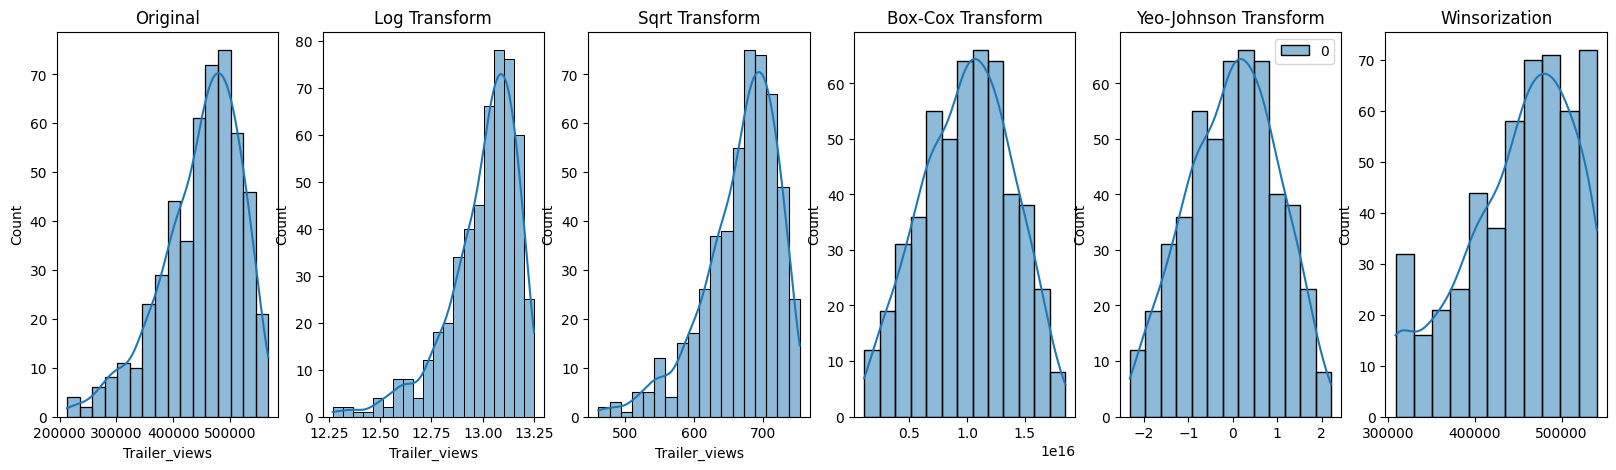

Shapiro (Original): ShapiroResult(statistic=0.9510594376068318, pvalue=6.761193140297093e-12)
Shapiro (Log): ShapiroResult(statistic=0.897265870127586, pvalue=6.3476164040472455e-18)
Shapiro (Sqrt): ShapiroResult(statistic=0.927633536908315, pvalue=6.610650184399822e-15)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9889322987955641, pvalue=0.000717482866627918)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9889322977990502, pvalue=0.0007174823293589085)
Shapiro (Winsorization): ShapiroResult(statistic=0.9429766158457962, pvalue=4.997658651345972e-13)


In [43]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Trailer_views'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Trailer_views'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Trailer_views'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Trailer_views']])

winsorized_budget = winsorize(df_transformed['Trailer_views'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Trailer_views'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Trailer_views']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

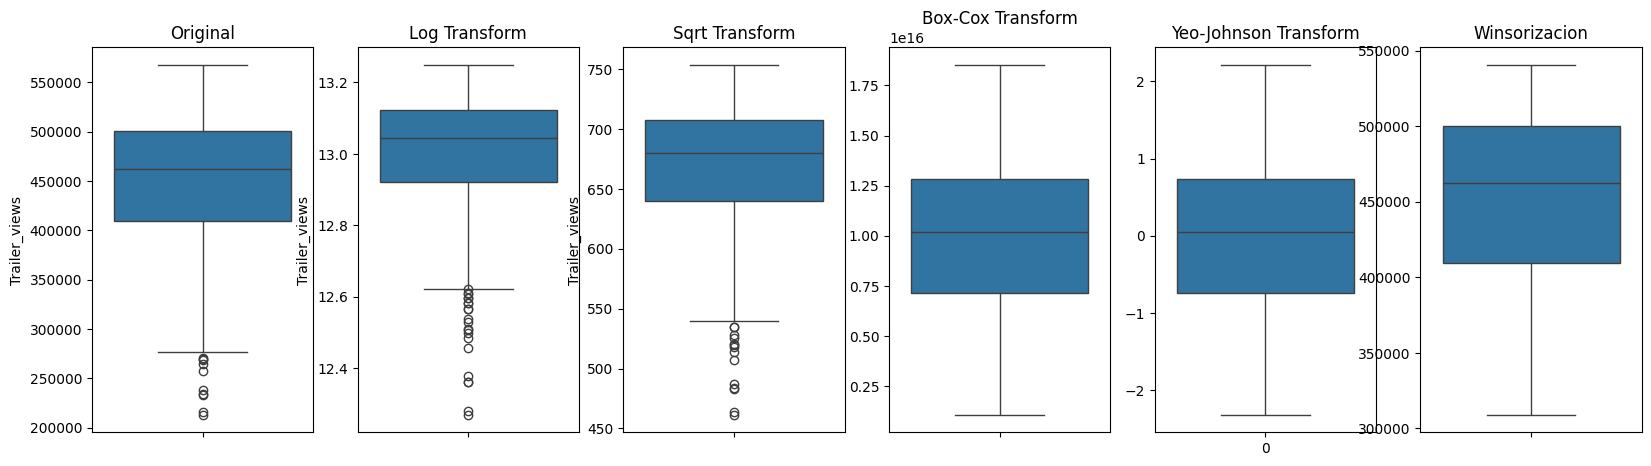

In [44]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Trailer_views'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')

In [45]:
df_transformed['Trailer_views']=box_cox_transformed

#### Time taken

count    494.000000
mean     157.391498
std       31.295161
min        0.000000
25%      132.300000
50%      160.000000
75%      181.890000
max      217.520000
Name: Time_taken, dtype: float64


<Axes: ylabel='Time_taken'>

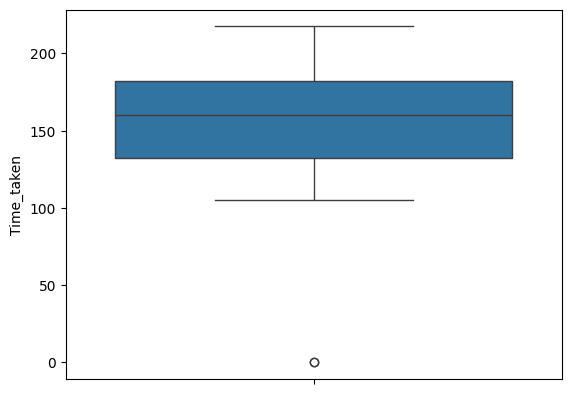

In [46]:
print(df['Time_taken'].describe())
sns.boxplot(df['Time_taken'])

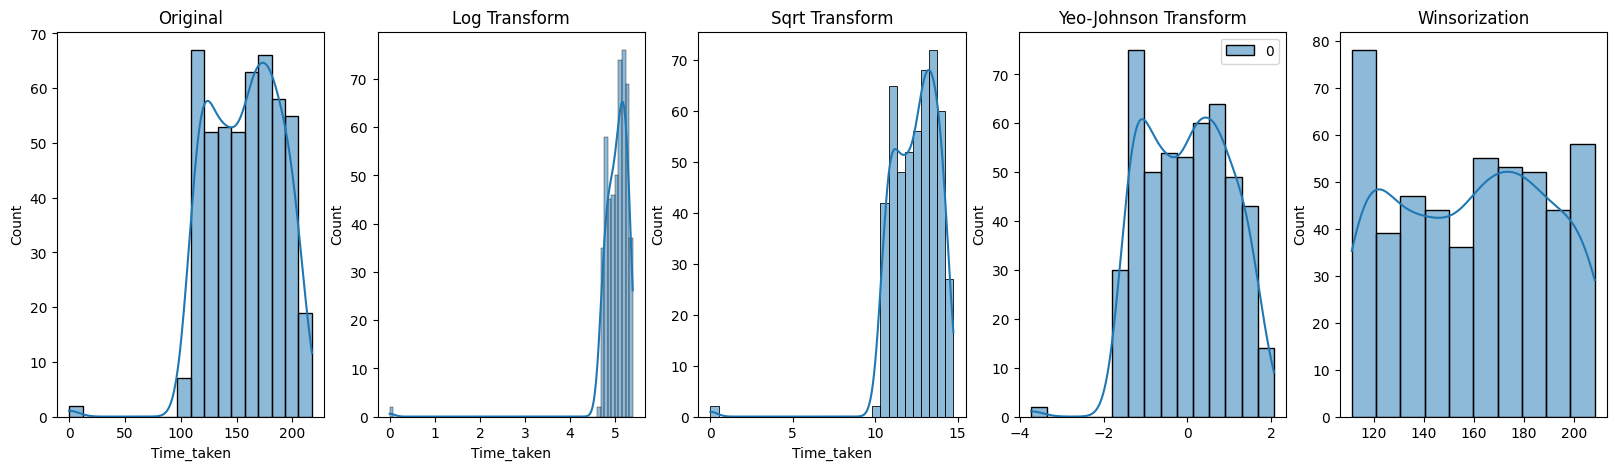

Shapiro (Original): ShapiroResult(statistic=nan, pvalue=nan)
Shapiro (Log): ShapiroResult(statistic=nan, pvalue=nan)
Shapiro (Sqrt): ShapiroResult(statistic=nan, pvalue=nan)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=nan, pvalue=nan)
Shapiro (Winsorization): ShapiroResult(statistic=0.9464637930441351, pvalue=1.488563345799661e-12)


In [47]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
#box_cox_transformed, _ = boxcox(df['Time_taken'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Time_taken'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Time_taken'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Time_taken']])

winsorized_budget = winsorize(df_transformed['Time_taken'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

sns.histplot(df['Time_taken'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

#sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
#ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[3])
ax[3].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[4])
ax[4].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Time_taken']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))

print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

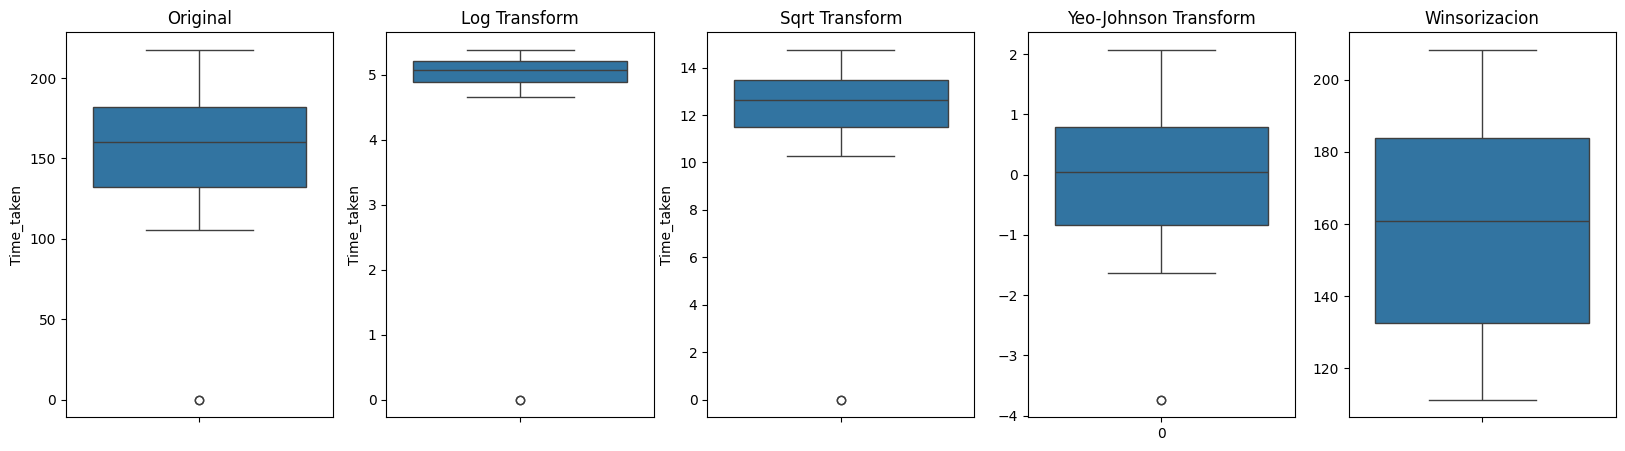

In [48]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
sns.boxplot(df['Time_taken'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')


sns.boxplot(yeo_johnson_transformed, ax=ax[3])
ax[3].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[4])
ax[4].set_title('Winsorizacion')

In [49]:
df_transformed['Time_taken']=winsorized_budget

#### Twitter hashtagas

count     506.000000
mean      260.832095
std       104.779133
min       201.152000
25%       223.796000
50%       254.400000
75%       283.416000
max      2022.400000
Name: Twitter_hastags, dtype: float64


<Axes: ylabel='Twitter_hastags'>

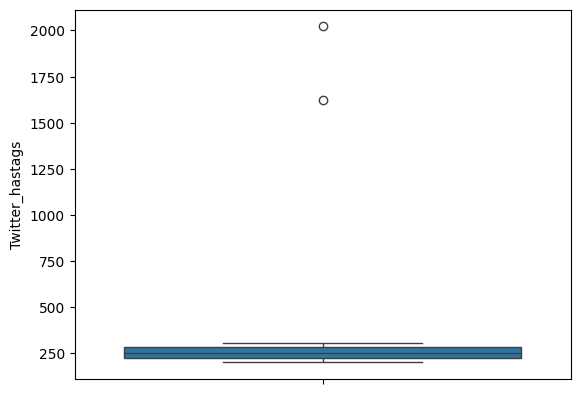

In [50]:
print(df['Twitter_hastags'].describe())
sns.boxplot(df['Twitter_hastags'])

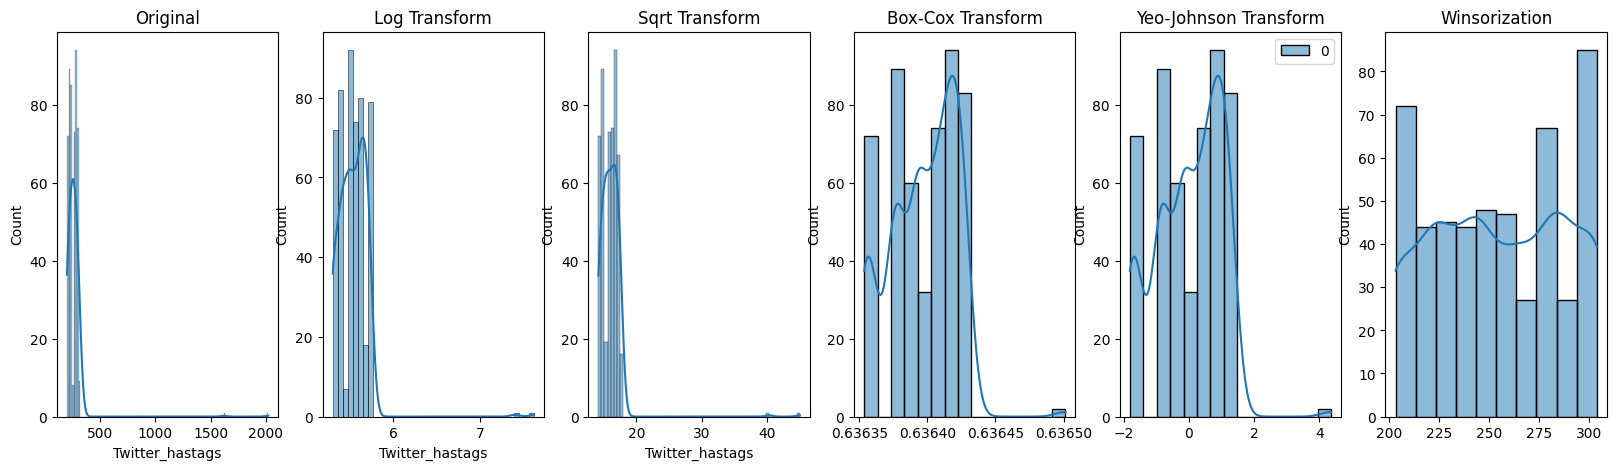

Shapiro (Original): ShapiroResult(statistic=0.2334974815618467, pvalue=3.9567632991254914e-41)
Shapiro (Log): ShapiroResult(statistic=0.677174864037354, pvalue=6.543897921635412e-30)
Shapiro (Sqrt): ShapiroResult(statistic=0.44181512283218605, pvalue=8.484383272120575e-37)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9169539081936322, pvalue=4.688753224959717e-16)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9169539142420434, pvalue=4.68875992342918e-16)
Shapiro (Winsorization): ShapiroResult(statistic=0.9191241006398018, pvalue=7.866237263287728e-16)


In [51]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Twitter_hastags'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Twitter_hastags'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Twitter_hastags'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Twitter_hastags']])

winsorized_budget = winsorize(df_transformed['Twitter_hastags'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Twitter_hastags'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Twitter_hastags']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

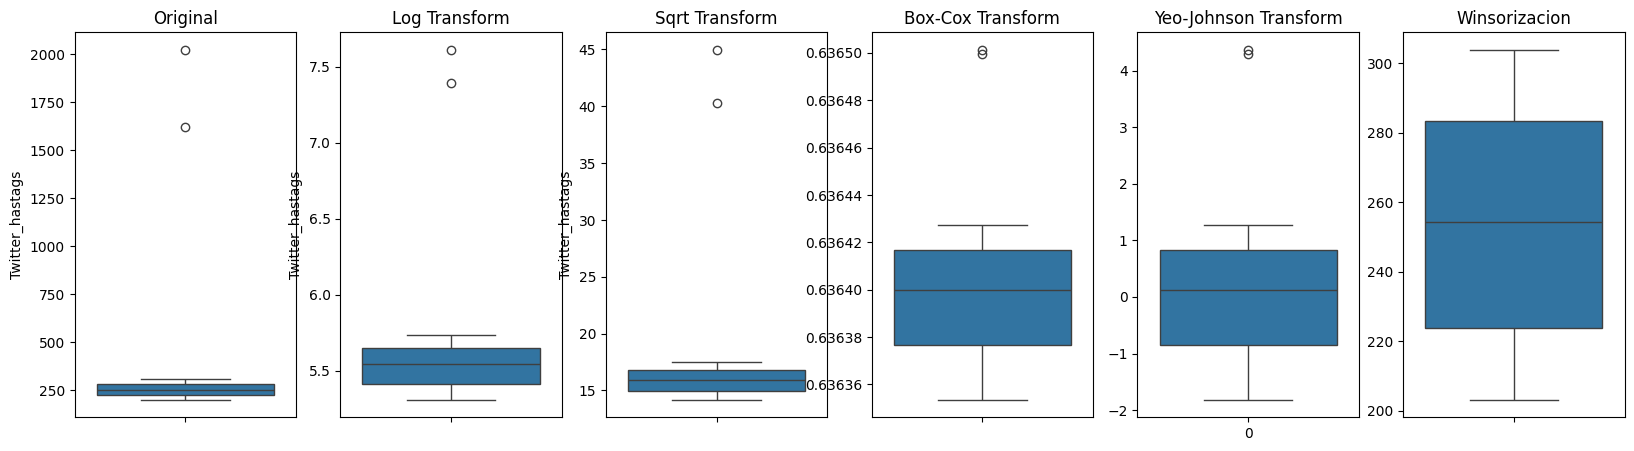

In [52]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Twitter_hastags'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')

In [53]:
df_transformed['Twitter_hastags']=winsorized_budget

#### Num multiplier

count    506.000000
mean     545.043478
std      106.332889
min      333.000000
25%      465.000000
50%      535.500000
75%      614.750000
max      868.000000
Name: Num_multiplex, dtype: float64


<Axes: ylabel='Num_multiplex'>

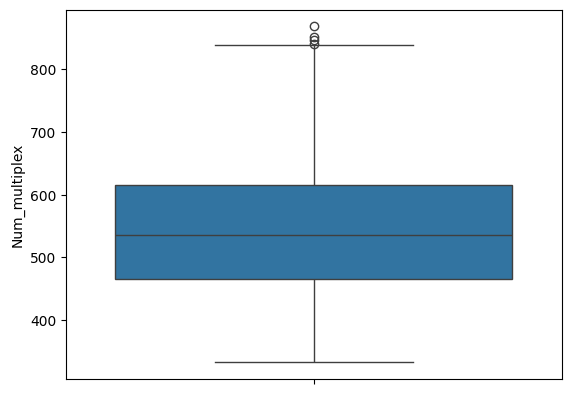

In [54]:
print(df['Num_multiplex'].describe())
sns.boxplot(df['Num_multiplex'])

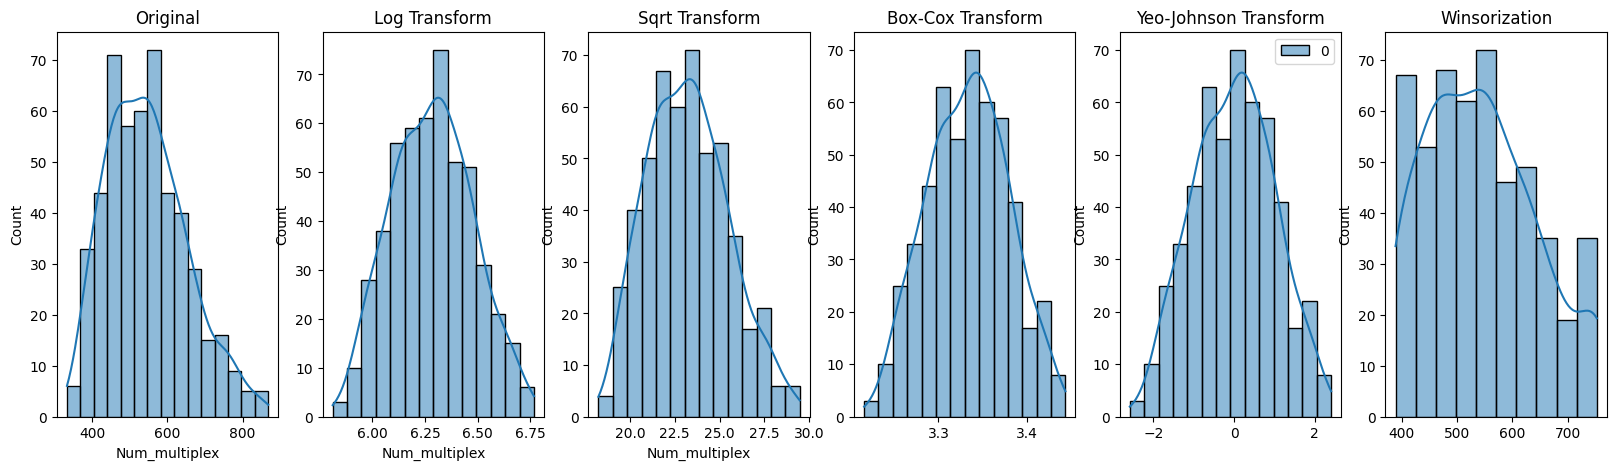

Shapiro (Original): ShapiroResult(statistic=0.9749276645186176, pvalue=1.273018530746107e-07)
Shapiro (Log): ShapiroResult(statistic=0.9927138840739297, pvalue=0.014553543711836158)
Shapiro (Sqrt): ShapiroResult(statistic=0.9868520598510682, pvalue=0.0001580291834975677)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9933802596088186, pvalue=0.025507941173399995)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.993380259613289, pvalue=0.0255079412699427)
Shapiro (Winsorization): ShapiroResult(statistic=0.9611990639952652, pvalue=2.742607683118996e-10)


In [55]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Num_multiplex'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Num_multiplex'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Num_multiplex'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Num_multiplex']])

winsorized_budget = winsorize(df_transformed['Num_multiplex'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Num_multiplex'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Num_multiplex']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

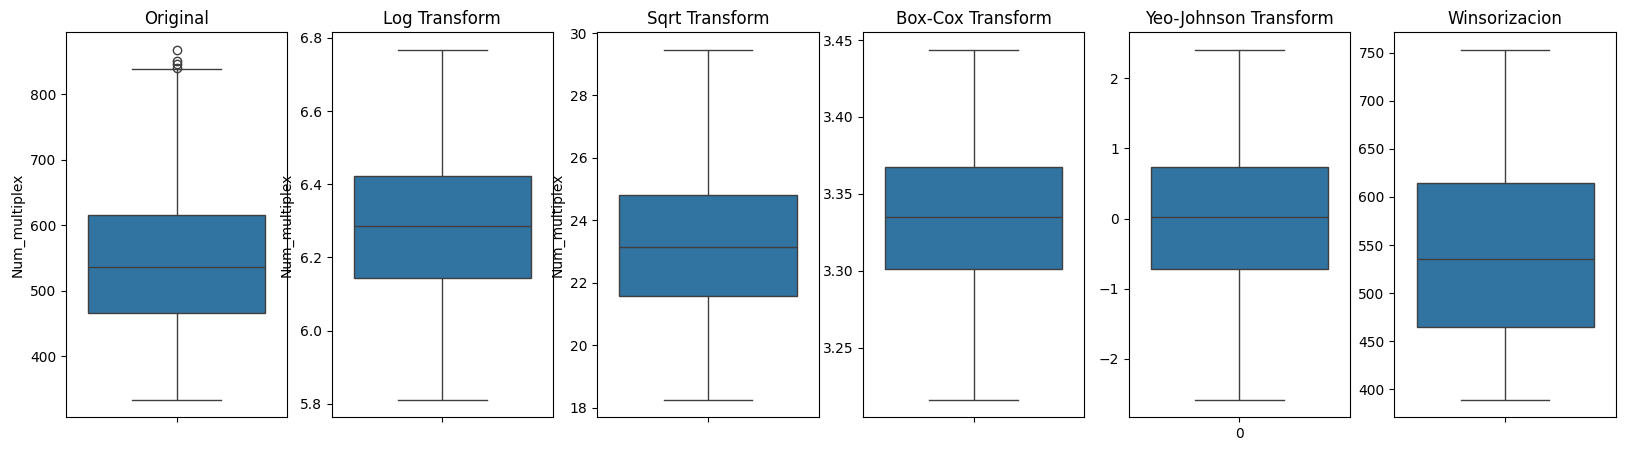

In [56]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Num_multiplex'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')

In [57]:
df_transformed['Num_multiplex']=box_cox_transformed

#### collection

count       506.000000
mean      45057.707510
std       18364.351764
min       10000.000000
25%       34050.000000
50%       42400.000000
75%       50000.000000
max      100000.000000
Name: Collection, dtype: float64


<Axes: ylabel='Collection'>

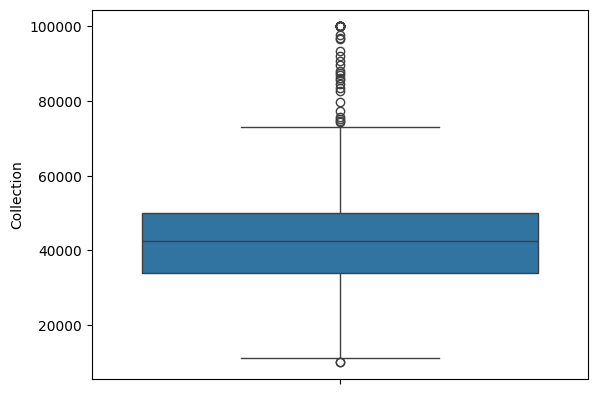

In [58]:
print(df['Collection'].describe())
sns.boxplot(df['Collection'])

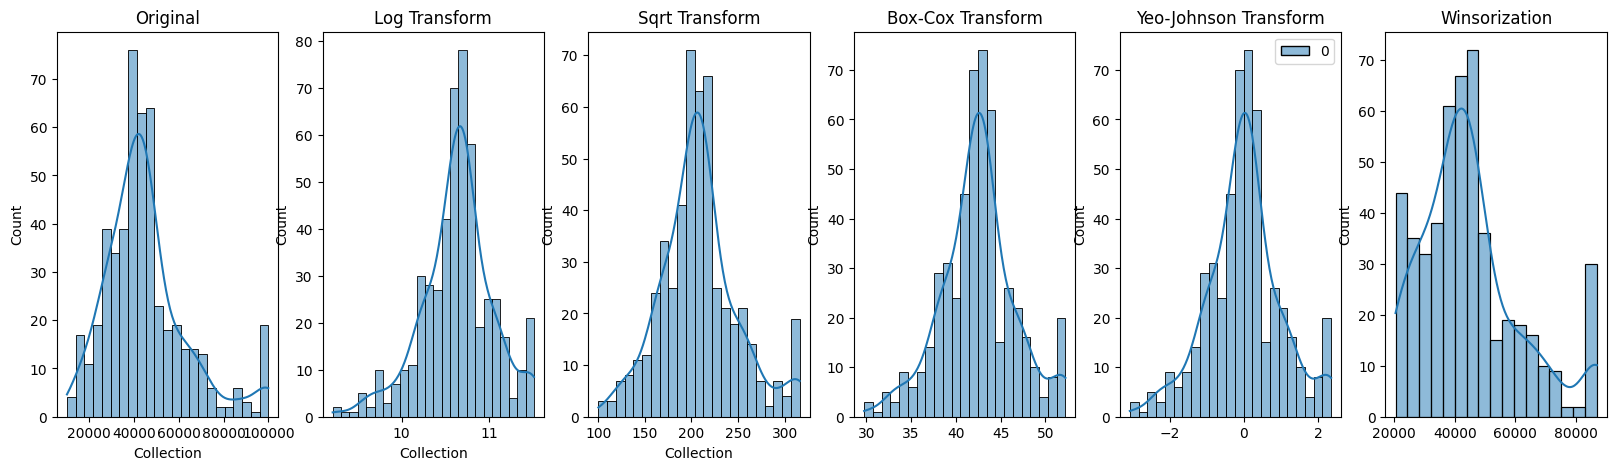

Shapiro (Original): ShapiroResult(statistic=0.9169041624505986, pvalue=4.633995018112416e-16)
Shapiro (Log): ShapiroResult(statistic=0.9752353039224435, pvalue=1.4909379673791067e-07)
Shapiro (Sqrt): ShapiroResult(statistic=0.9696394937517703, pvalue=9.852523731587168e-09)
Shapiro (Box-Cox): ShapiroResult(statistic=0.9796683538094587, pvalue=1.6580714012766987e-06)
Shapiro (Yeo-Johnson): ShapiroResult(statistic=0.9796683538993508, pvalue=1.6580714867693687e-06)
Shapiro (Winsorization): ShapiroResult(statistic=0.92472317628262, pvalue=3.1322989789819192e-15)


In [59]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
box_cox_transformed, _ = boxcox(df['Collection'] + 1)  # Evita log(0)
log_transformed = np.log1p(df['Collection'])            # log(1 + x) para evitar log(0)
sqrt_transformed = np.sqrt(df['Collection'])            

# Yeo-Johnson (funciona con valores negativos y 0)
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = yeo_johnson_transformer.fit_transform(df[['Collection']])

winsorized_budget = winsorize(df_transformed['Collection'], limits=[0.05, 0.05])
# Visualización
fig, ax = plt.subplots(1, 6, figsize=(20, 5))

sns.histplot(df['Collection'], kde=True, ax=ax[0])
ax[0].set_title('Original')

sns.histplot(log_transformed, kde=True, ax=ax[1])
ax[1].set_title('Log Transform')

sns.histplot(sqrt_transformed, kde=True, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.histplot(box_cox_transformed, kde=True, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.histplot(yeo_johnson_transformed, kde=True, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')

sns.histplot(winsorized_budget, kde=True, ax=ax[5])
ax[5].set_title('Winsorization')

plt.show()

# Prueba de normalidad Shapiro-Wilk
print("Shapiro (Original):", stats.shapiro(df['Collection']))
print("Shapiro (Log):", stats.shapiro(log_transformed))
print("Shapiro (Sqrt):", stats.shapiro(sqrt_transformed))
print("Shapiro (Box-Cox):", stats.shapiro(box_cox_transformed))
print("Shapiro (Yeo-Johnson):", stats.shapiro(yeo_johnson_transformed))
print("Shapiro (Winsorization):", shapiro(winsorized_budget))

Text(0.5, 1.0, 'Winsorizacion')

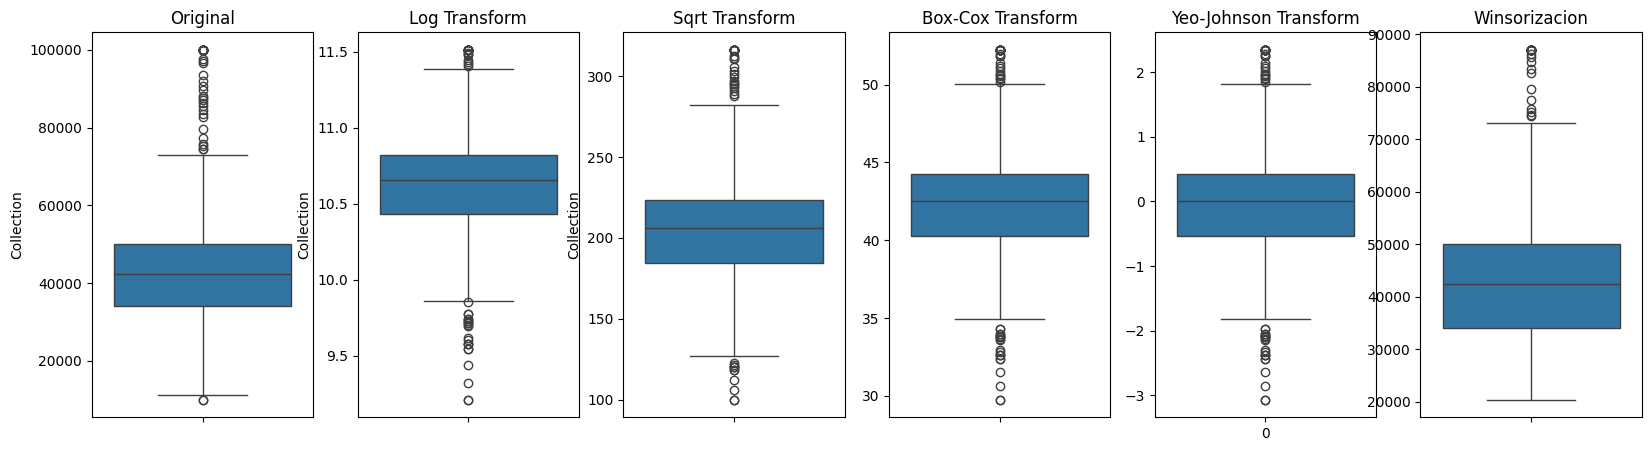

In [60]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
sns.boxplot(df['Collection'], ax=ax[0])
ax[0].set_title('Original')

sns.boxplot(log_transformed, ax=ax[1])
ax[1].set_title('Log Transform')

sns.boxplot(sqrt_transformed, ax=ax[2])
ax[2].set_title('Sqrt Transform')

sns.boxplot(box_cox_transformed, ax=ax[3])
ax[3].set_title('Box-Cox Transform')

sns.boxplot(yeo_johnson_transformed, ax=ax[4])
ax[4].set_title('Yeo-Johnson Transform')
sns.boxplot(winsorized_budget, ax=ax[5])
ax[5].set_title('Winsorizacion')

### Prubea final de transformacion

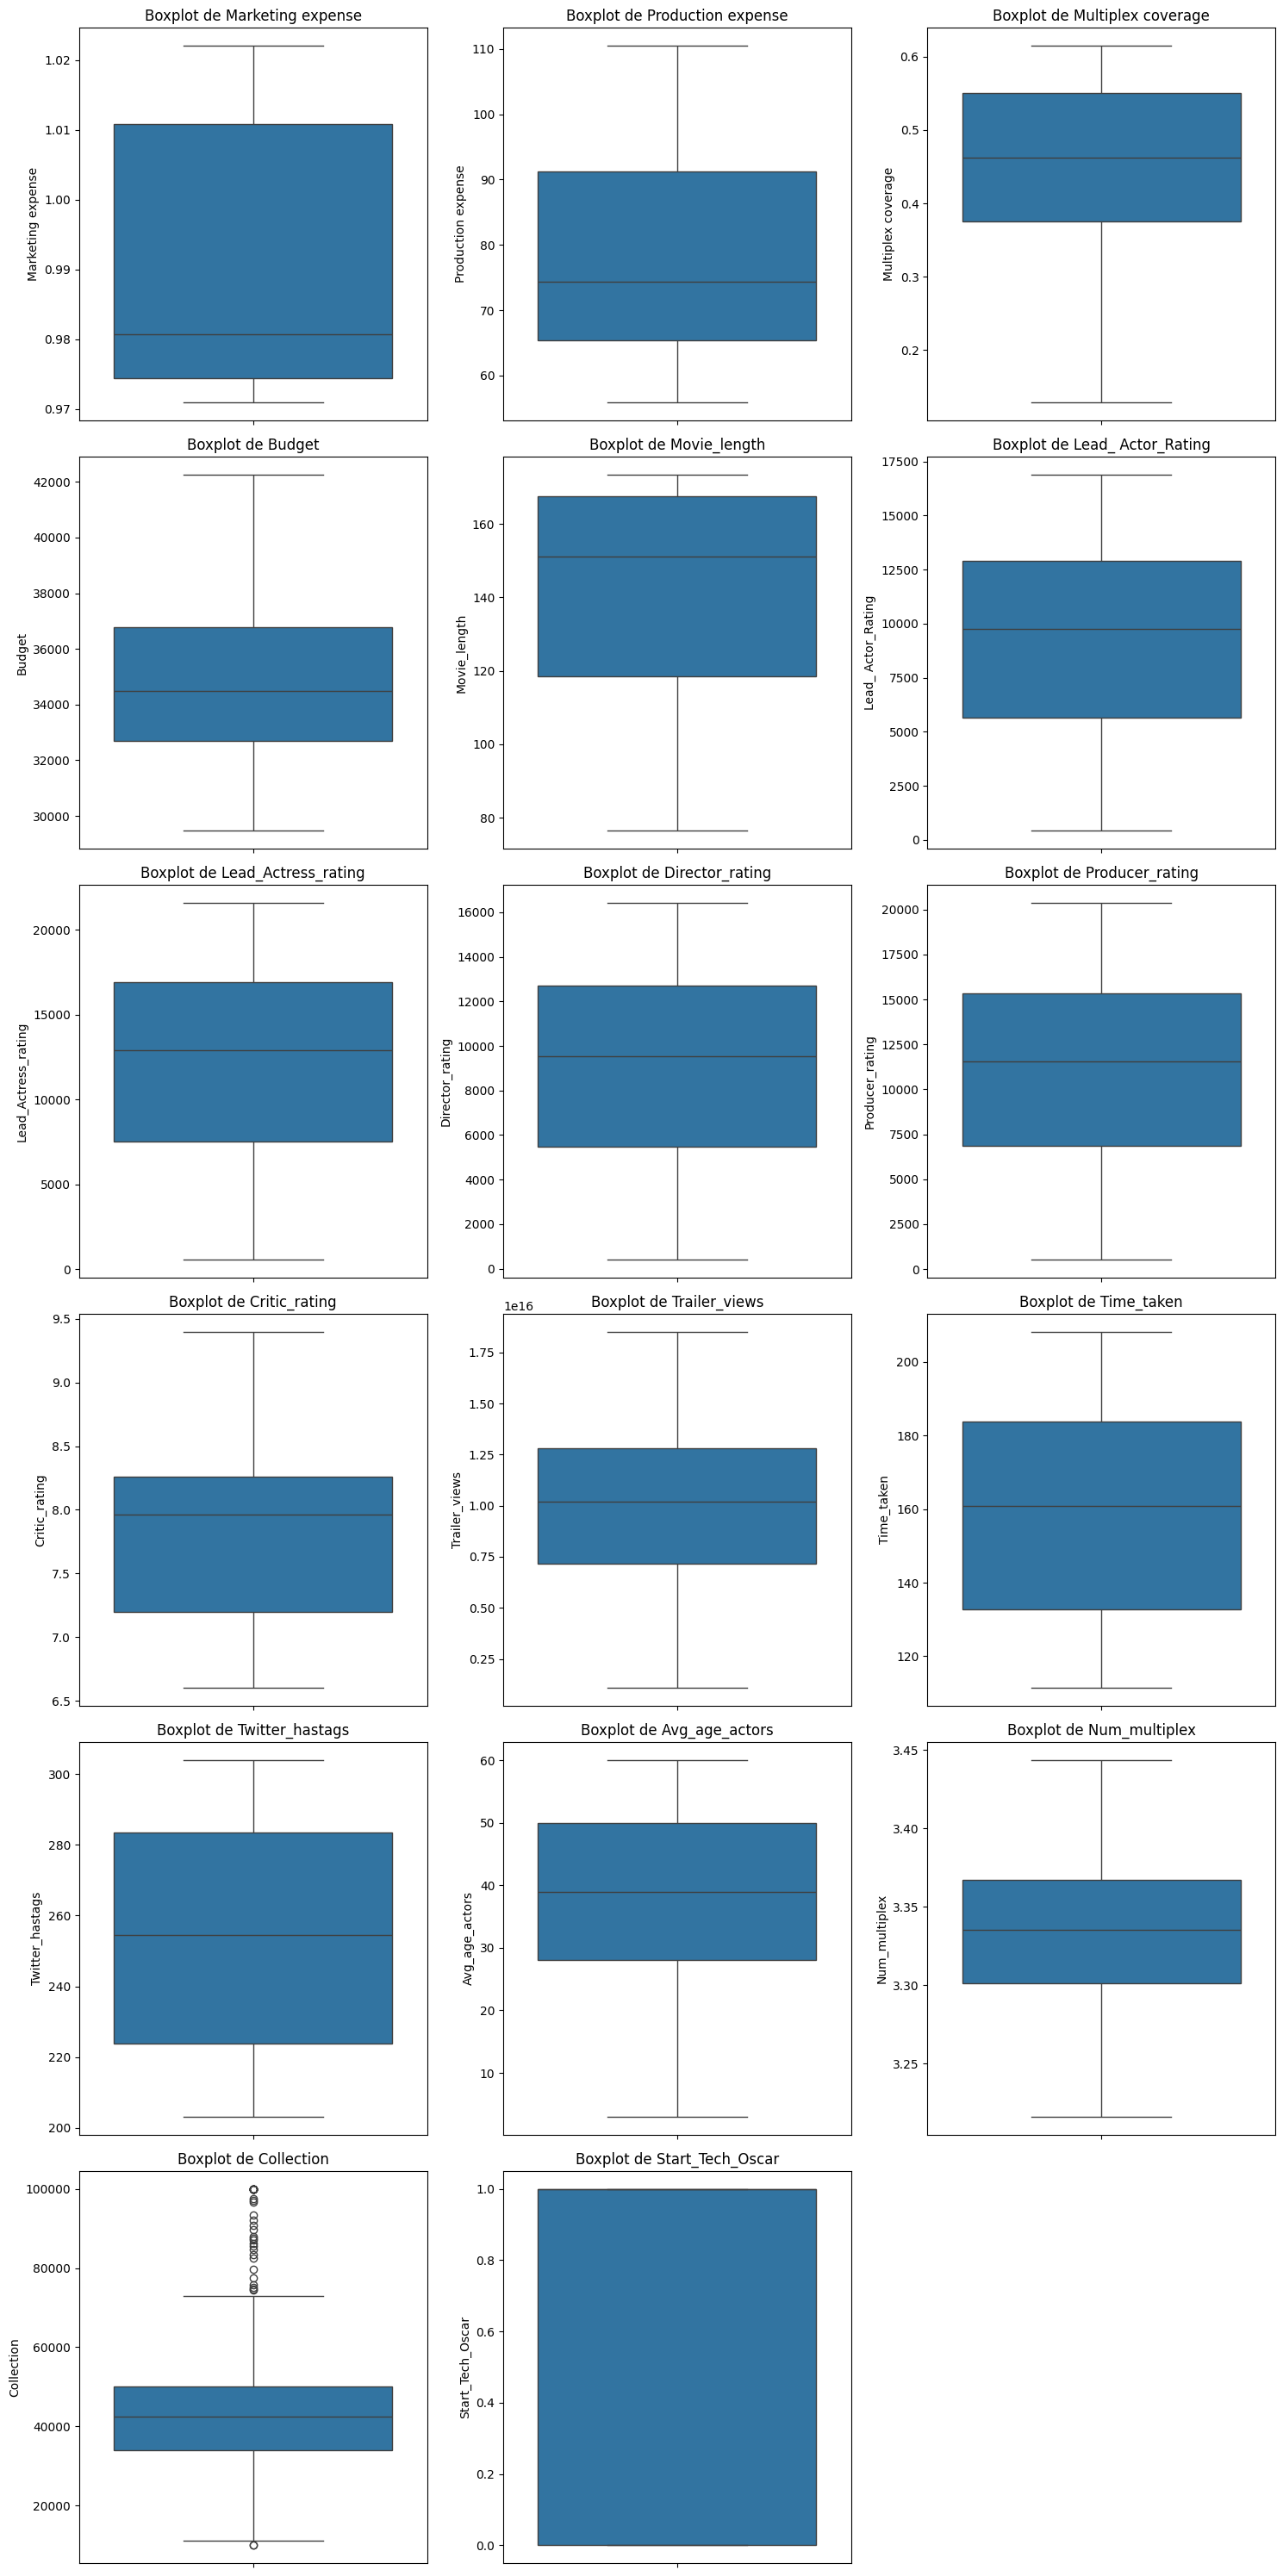

In [61]:
plots_box(df_transformed)

# Prueba de multicolinealidad y de correlacionm

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_transformed.drop(columns=['Start_Tech_Oscar'])
X = X.astype({ 
    'Genre_Action': int, 
    'Genre_Comedy': int, 
    'Genre_Drama': int, 
    'Genre_Thriller': int 
})
#print(X.info())
# Calcula VIF para cada característica
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Feature         VIF
0      Marketing expense    0.118786
1     Production expense    2.264281
2     Multiplex coverage    2.764459
3                 Budget    1.275712
4           Movie_length    2.801876
5     Lead_ Actor_Rating  190.340790
6    Lead_Actress_rating  222.057240
7        Director_rating  204.347178
8        Producer_rating   54.958501
9          Critic_rating    0.754475
10         Trailer_views    3.882725
11            Time_taken    0.926009
12       Twitter_hastags    0.823931
13        Avg_age_actors    1.005695
14         Num_multiplex    0.065365
15            Collection    2.754713
16  3D_available_encoded    1.053318
17          Genre_Action    1.028150
18          Genre_Comedy    1.020566
19           Genre_Drama    1.014707
20        Genre_Thriller    1.025663


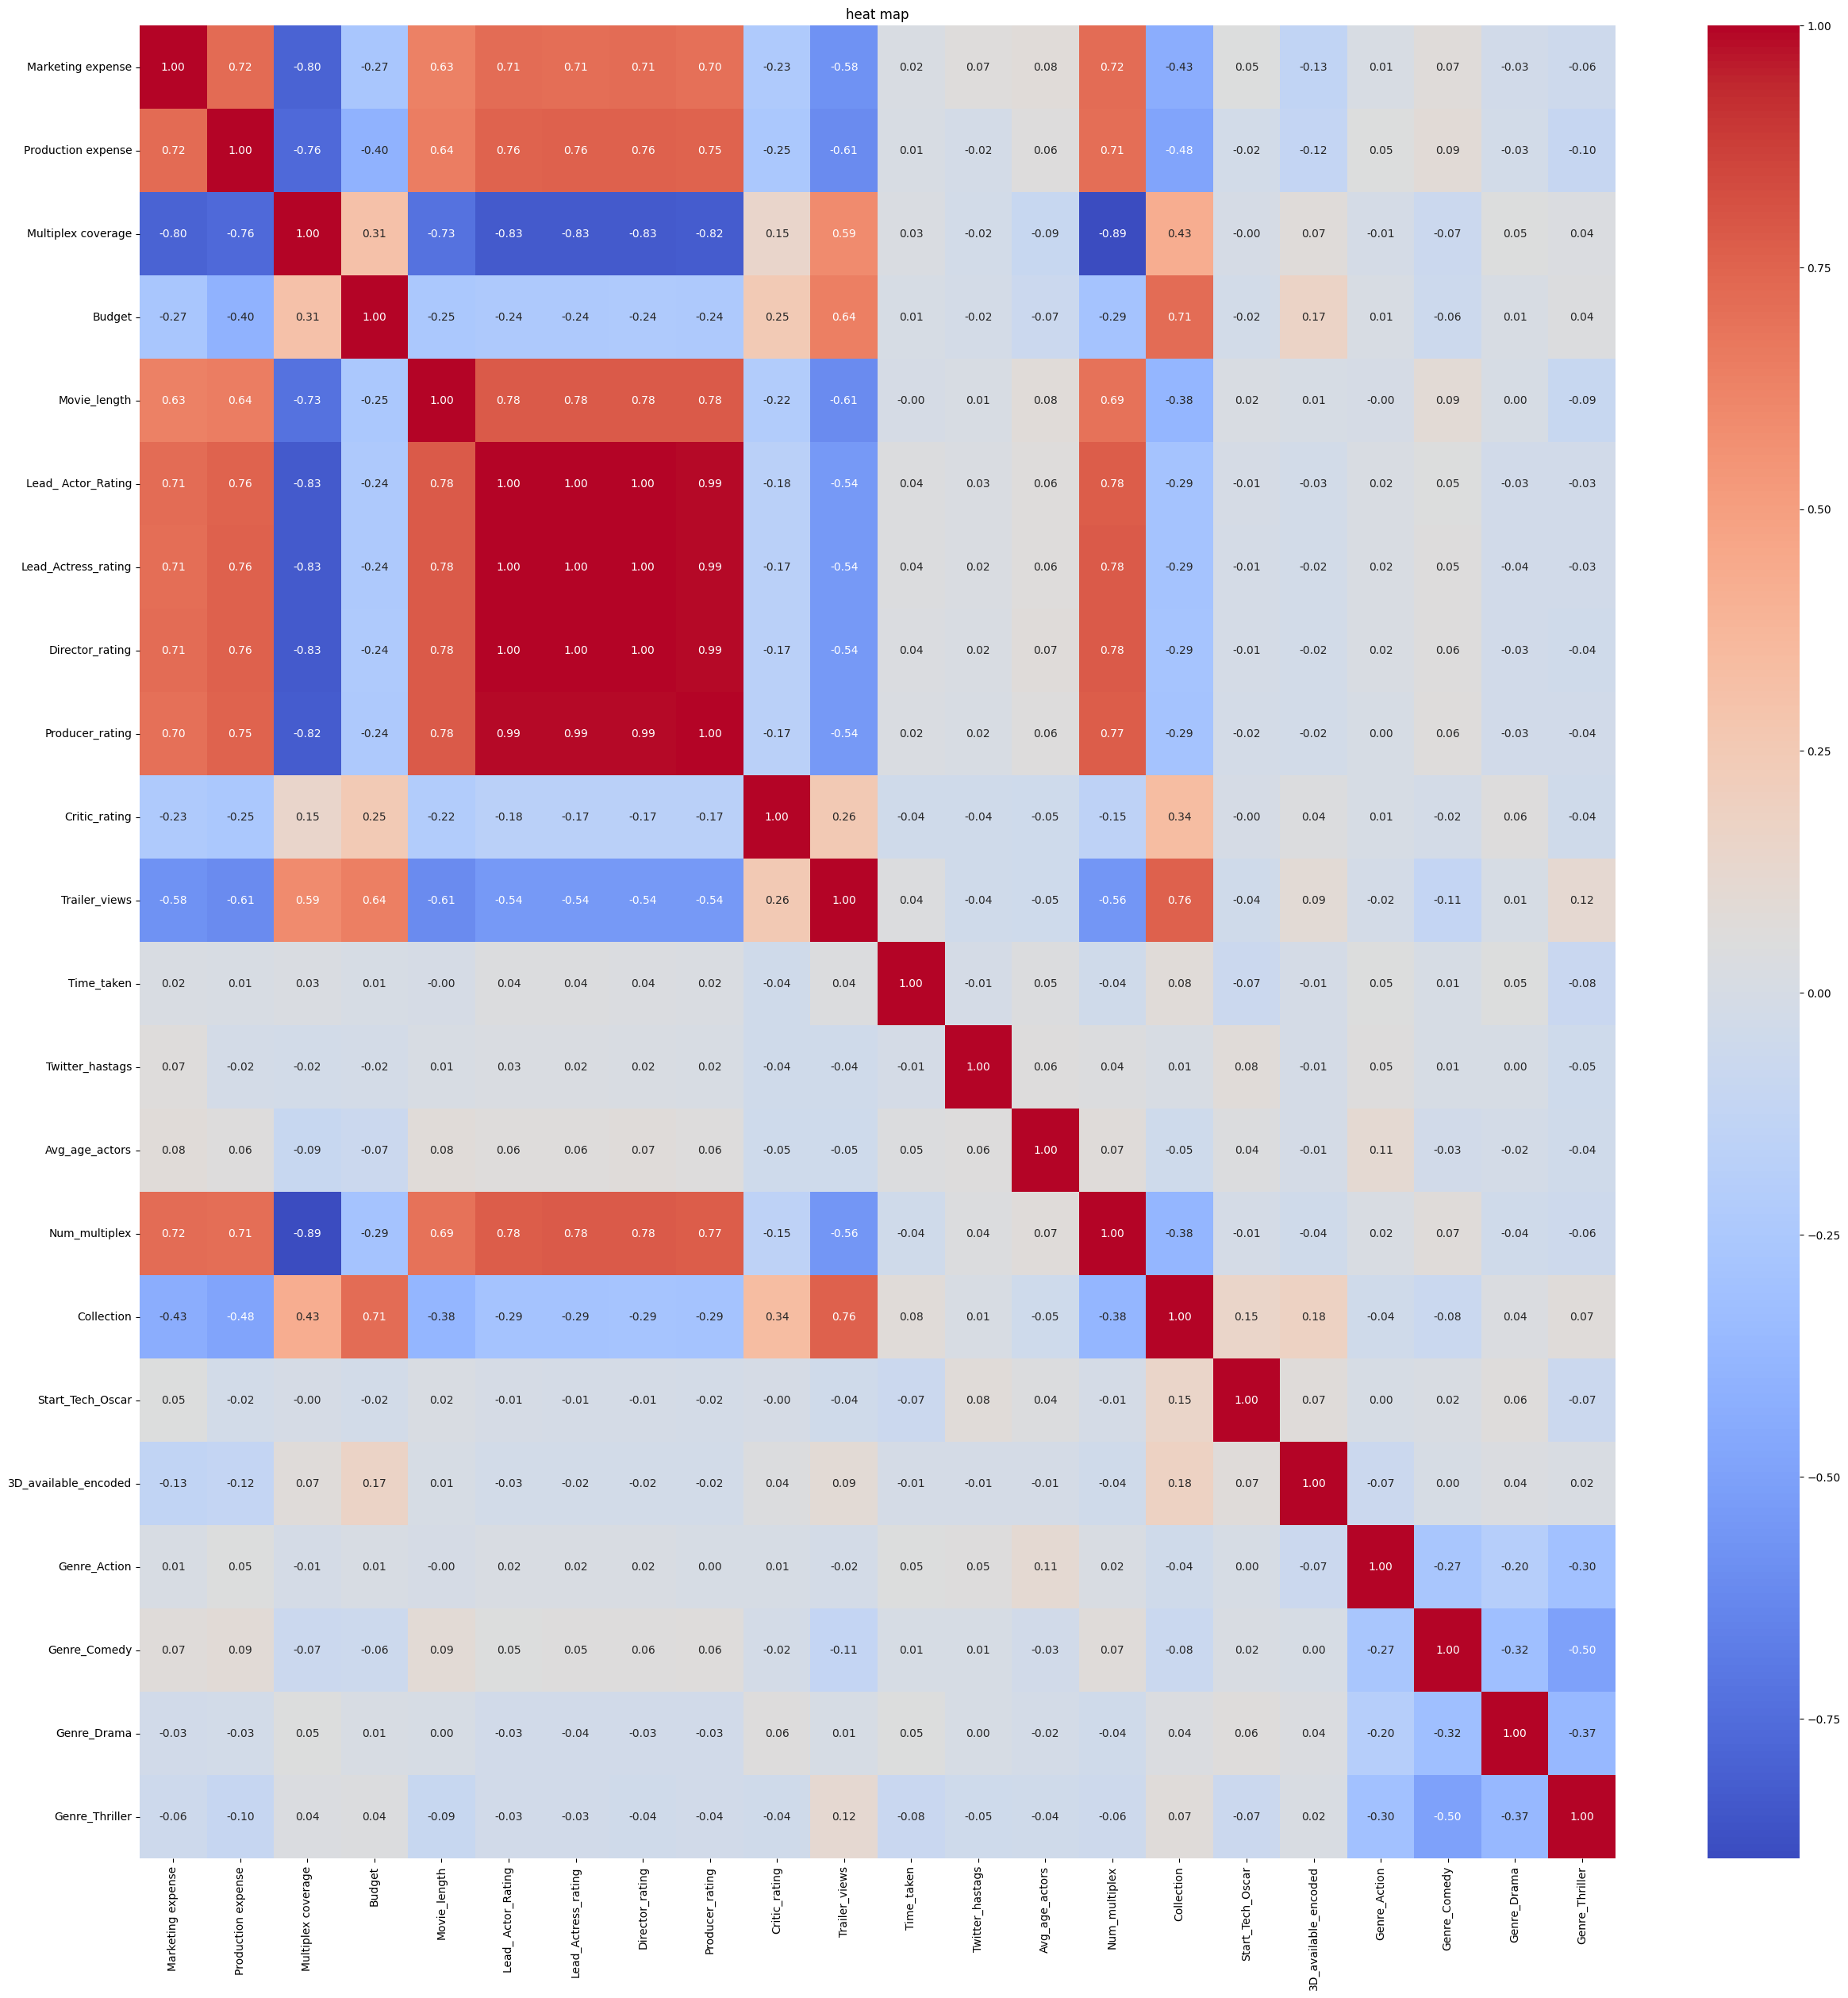

In [63]:
plt.figure(figsize=(30,30))
sns.heatmap(df_transformed.corr(),annot=True, fmt=".2f", cmap='coolwarm')
plt.title('heat map')
plt.show()

#### Corregir La multicolinealdiad

In [64]:
X['Lead_rating']=(X['Lead_ Actor_Rating']+X['Lead_Actress_rating']+X['Director_rating']+X['Producer_rating'])/4
X_reduced=X.drop(['Lead_ Actor_Rating','Lead_Actress_rating','Director_rating','Producer_rating'],axis=1)



In [65]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print(vif_data)

                 Feature       VIF
0      Marketing expense  0.118046
1     Production expense  2.258855
2     Multiplex coverage  2.723463
3                 Budget  1.269080
4           Movie_length  2.792067
5          Critic_rating  0.750802
6          Trailer_views  3.879543
7             Time_taken  0.914615
8        Twitter_hastags  0.815875
9         Avg_age_actors  0.993798
10         Num_multiplex  0.064871
11            Collection  2.748357
12  3D_available_encoded  1.049696
13          Genre_Action  1.020454
14          Genre_Comedy  1.015536
15           Genre_Drama  1.009714
16        Genre_Thriller  1.018968
17           Lead_rating  3.038451


In [66]:
df_transformed['Lead_rating']=X['Lead_rating']
df_transformed=df_transformed.drop(['Lead_ Actor_Rating','Lead_Actress_rating','Director_rating','Producer_rating'],axis=1)
print(df_transformed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marketing expense     506 non-null    float64
 1   Production expense    506 non-null    float64
 2   Multiplex coverage    506 non-null    float64
 3   Budget                506 non-null    float64
 4   Movie_length          506 non-null    float64
 5   Critic_rating         506 non-null    float64
 6   Trailer_views         506 non-null    float64
 7   Time_taken            506 non-null    float64
 8   Twitter_hastags       506 non-null    float64
 9   Avg_age_actors        506 non-null    int64  
 10  Num_multiplex         506 non-null    float64
 11  Collection            506 non-null    int64  
 12  Start_Tech_Oscar      506 non-null    int64  
 13  3D_available_encoded  506 non-null    int32  
 14  Genre_Action          506 non-null    bool   
 15  Genre_Comedy          5

## Normalizar

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del escalador
scaler = MinMaxScaler()

# Seleccionar las columnas a escalar
columns_to_scale = [
    'Marketing expense', 'Production expense', 'Multiplex coverage',
    'Budget', 'Movie_length', 'Critic_rating', 'Trailer_views',
    'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
    'Collection', 'Lead_rating'
]

# Aplicar el escalado a las columnas seleccionadas
df_transformed[columns_to_scale] = scaler.fit_transform(df_transformed[columns_to_scale])

# Verificar la transformación
print(df_transformed.head())

   Marketing expense  Production expense  Multiplex coverage    Budget  \
0           0.000000            0.067815            0.685185  0.551171   
1           0.019304            0.242302            0.827160  0.484389   
2           0.019286            0.242302            0.827160  0.815698   
3           0.023847            0.063050            0.849794  0.734605   
4           0.055564            0.063050            0.849794  0.799219   

   Movie_length  Critic_rating  Trailer_views  Time_taken  Twitter_hastags  \
0      0.641607       0.478571       0.794933    0.000000         0.205177   
1      0.782698       0.300000       0.646970    0.364274         0.399873   
2      0.599382       0.300000       0.891201    0.377063         1.000000   
3      0.441813       0.592857       0.743632    0.763614         0.220105   
4      0.528321       0.592857       0.814340    0.672030         0.224551   

   Avg_age_actors  Num_multiplex  Collection  Start_Tech_Oscar  \
0        0.350877   

# Modelo con XGboost y random forest

Características seleccionadas: Index(['Marketing expense', 'Production expense', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Collection',
       '3D_available_encoded', 'Genre_Drama', 'Genre_Thriller'],
      dtype='object')

Random Forest:
Mejor puntuación: 0.655156862745098
Mejor parámetro: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[41 28]
 [34 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.59      0.57        69
           1       0.64      0.59      0.61        83

    accuracy                           0.59       152
   macro avg       0.59      0.59      0.59       152
weighted avg       0.60      0.59      0.59       152



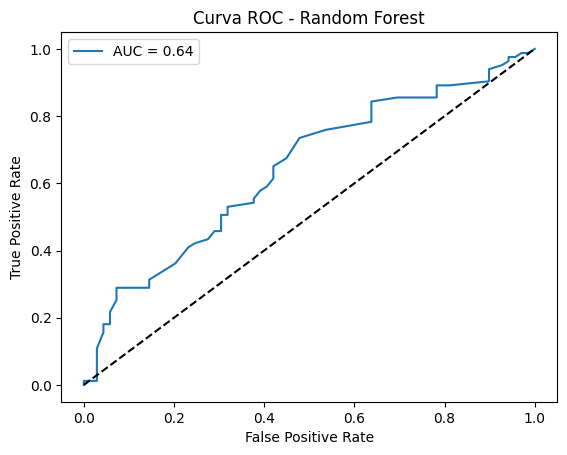

c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Mejor puntuación: 0.6531176470588235
Mejor parámetro: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[45 24]
 [31 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62        69
           1       0.68      0.63      0.65        83

    accuracy                           0.64       152
   macro avg       0.64      0.64      0.64       152
weighted avg       0.64      0.64      0.64       152



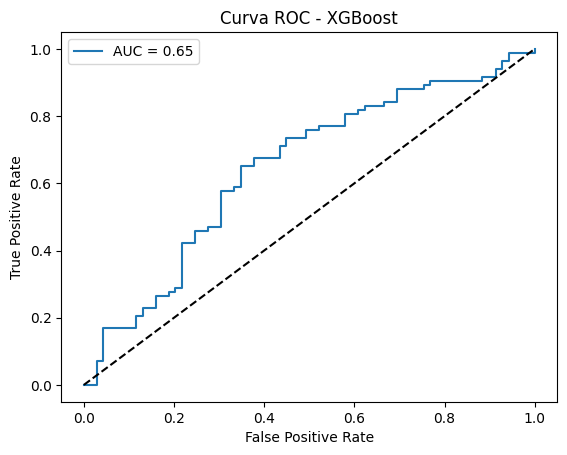

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Suponiendo que ya tienes tu DataFrame df_transformed y has definido las columnas
X = df_transformed.drop('Start_Tech_Oscar', axis=1)  # Características
y = df_transformed['Start_Tech_Oscar']  # Variable objetivo

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Seleccionar las 10 mejores características con SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Función para ajustar y evaluar modelos
def fit_and_evaluate_model(model, param_grid, model_name):
    # Configurar la validación cruzada repetida (10 folds, 2 repeticiones)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

    # Configurar el GridSearch con la validación cruzada 10x2
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Ajustar el modelo con los datos seleccionados y balanceados
    grid_search.fit(X, y)

    # Mostrar los resultados
    print(f'\n{model_name}:')
    print(f'Mejor puntuación: {grid_search.best_score_}')
    print(f'Mejor parámetro: {grid_search.best_params_}')

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.3, random_state=42, stratify=y
    )

    # Ajustar el modelo con los mejores parámetros
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Evaluar en el conjunto de prueba
    y_pred = best_model.predict(X_test)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Calcular las probabilidades
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Línea base
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend()
    plt.show()

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}
fit_and_evaluate_model(RandomForestClassifier(random_state=42), rf_param_grid, 'Random Forest')


# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
fit_and_evaluate_model(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_param_grid, 'XGBoost')


Características seleccionadas: Index(['Marketing expense', 'Multiplex coverage', 'Trailer_views',
       'Twitter_hastags', 'Avg_age_actors', 'Collection',
       '3D_available_encoded', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Thriller'],
      dtype='object')

Random Forest:
Mejor puntuación: 0.7727777777777777
Mejor parámetro: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': False}

Matriz de Confusión:
 [[19  2]
 [ 3 18]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.90      0.86      0.88        21

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



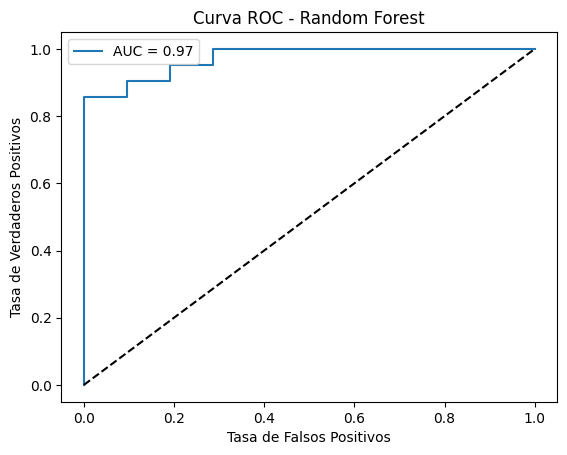

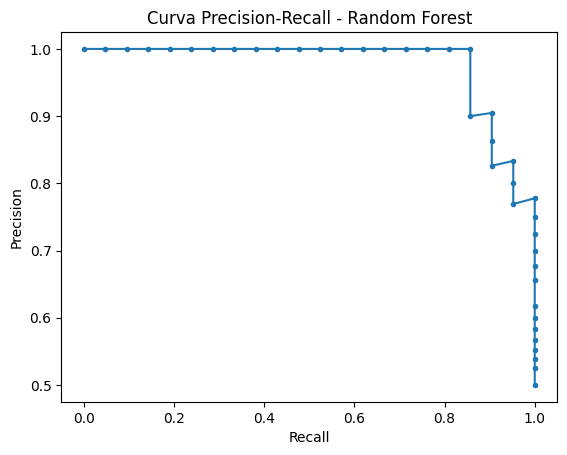

c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df_transformed
X = df_transformed.drop('Start_Tech_Oscar', axis=1)  # Características
y = df_transformed['Start_Tech_Oscar']  # Variable objetivo

# Escalar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Balanceo con SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_scaled, y)

# Seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Configurar validación cruzada repetida
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

# Función para ajustar y evaluar los modelos
def fit_and_evaluate_model(model, param_grid, model_name, search_type='grid'):
    # Escoger entre GridSearch o RandomizedSearch
    search_class = GridSearchCV if search_type == 'grid' else RandomizedSearchCV
    search = search_class(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Ajustar con el conjunto de entrenamiento
    search.fit(X_train, y_train)

    print(f'\n{model_name}:')
    print(f'Mejor puntuación: {search.best_score_}')
    print(f'Mejor parámetro: {search.best_params_}')

    # Ajustar el mejor modelo y hacer predicciones
    best_model = search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

    # Predicción de probabilidades para curva ROC y Precision-Recall
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend()
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure()
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Curva Precision-Recall - {model_name}')
    plt.show()

# Hiperparámetros para Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

fit_and_evaluate_model(RandomForestClassifier(random_state=42), rf_param_grid, 'Random Forest', 'random')

# Hiperparámetros para XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}

fit_and_evaluate_model(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_param_grid, 'XGBoost', 'grid'
)



In [69]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

# Deshabilitar uso de GPU


# Función para crear la red neuronal con diferentes funciones de activación
def create_nn_model(input_shape, activation_function='sigmoid'):
    model = Sequential()
    model.add(Dense(32, activation=activation_function, input_shape=input_shape))  # Capa oculta
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Ajustar y evaluar el modelo
def fit_and_evaluate_model(model, model_name):
    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    # Ajustar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluar
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Imprimir métricas
    print(f'\n{model_name}:')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Precisión
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

# Listado de funciones de activación a probar
activation_functions = ['sigmoid', 'relu', 'tanh', 'softmax']

# Probar cada función de activación
for activation in activation_functions:
    print(f"\nProbando función de activación: {activation}")
    nn_model = create_nn_model((X_selected.shape[1],), activation_function=activation)
    fit_and_evaluate_model(nn_model, f'Red Neuronal con {activation}')



Probando función de activación: sigmoid


c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Red Neuronal con sigmoid:
Confusion Matrix:
 [[38 18]
 [30 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.61        56
           1       0.58      0.45      0.51        55

    accuracy                           0.57       111
   macro avg       0.57      0.57      0.56       111
weighted avg       0.57      0.57      0.56       111

Accuracy: 0.5676

Probando función de activación: relu


c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Red Neuronal con relu:
Confusion Matrix:
 [[45 11]
 [29 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69        56
           1       0.70      0.47      0.57        55

    accuracy                           0.64       111
   macro avg       0.66      0.64      0.63       111
weighted avg       0.65      0.64      0.63       111

Accuracy: 0.6396

Probando función de activación: tanh


c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001FDD68C0360> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step 

Red Neuronal con tanh:
Confusion Matrix:
 [[43 13]
 [24 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70        56


c:\Users\USUARIO\anaconda3\envs\LP\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Red Neuronal con softmax:
Confusion Matrix:
 [[37 19]
 [29 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.66      0.61        56
           1       0.58      0.47      0.52        55

    accuracy                           0.57       111
   macro avg       0.57      0.57      0.56       111
weighted avg       0.57      0.57      0.56       111

Accuracy: 0.5676


Características seleccionadas: Index(['Marketing expense', 'Trailer_views', 'Time_taken', 'Twitter_hastags',
       'Avg_age_actors', 'Collection', '3D_available_encoded', 'Genre_Comedy',
       'Genre_Drama', 'Genre_Thriller'],
      dtype='object')

Clasificador Bayesiano (GaussianNB):
Confusion Matrix:
 [[43 13]
 [38 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.77      0.63        56
           1       0.57      0.31      0.40        55

    accuracy                           0.54       111
   macro avg       0.55      0.54      0.51       111
weighted avg       0.55      0.54      0.51       111

Accuracy: 0.5405


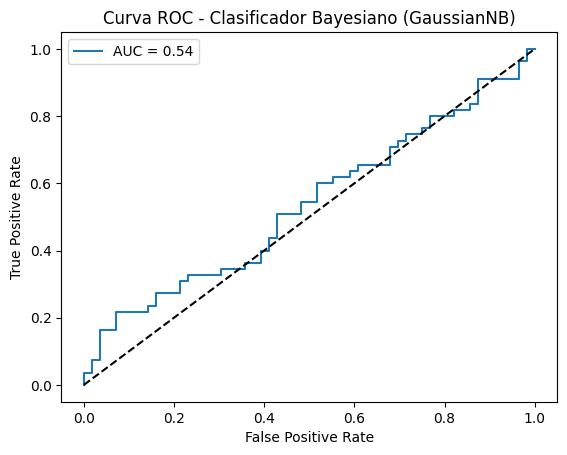

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Suponiendo que ya tienes tu DataFrame df_transformed y has definido las columnas
X = df_transformed.drop('Start_Tech_Oscar', axis=1)  # Características
y = df_transformed['Start_Tech_Oscar']  # Variable objetivo

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Seleccionar las 10 mejores características con SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Función para ajustar y evaluar modelos
def fit_and_evaluate_bayes_model(model, model_name):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    # Ajustar el modelo
    model.fit(X_train, y_train)

    # Evaluar en el conjunto de prueba
    y_pred = model.predict(X_test)

    print(f'\n{model_name}:')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Calcular y mostrar precisión
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Calcular las probabilidades
    y_prob = model.predict_proba(X_test)[:, 1]

    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Línea base
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend()
    plt.show()

# Instanciar el clasificador Naive Bayes
nb_model = GaussianNB()

# Ajustar y evaluar el modelo Naive Bayes
fit_and_evaluate_bayes_model(nb_model, 'Clasificador Bayesiano (GaussianNB)')


Confusion Matrix:
 [[42 14]
 [33 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.75      0.64        56
           1       0.61      0.40      0.48        55

    accuracy                           0.58       111
   macro avg       0.59      0.57      0.56       111
weighted avg       0.59      0.58      0.56       111

Accuracy: 0.5766


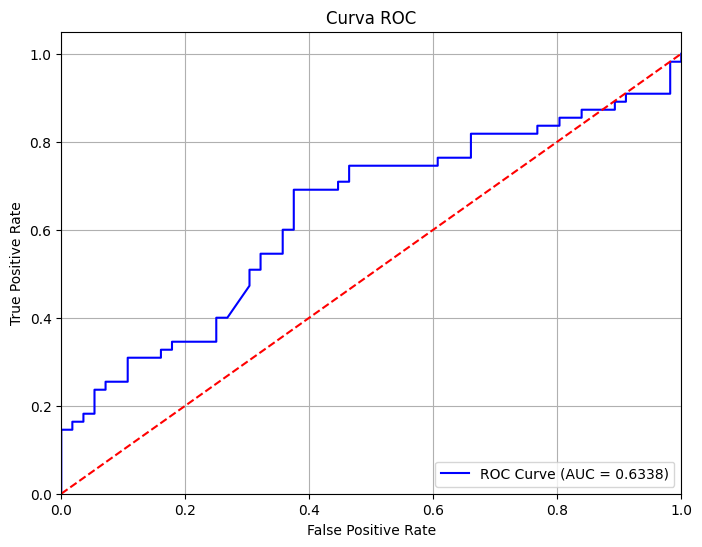

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Crear el modelo SVM
svm_model = SVC(kernel='linear', probability=True)  # 'probability=True' para obtener probabilidades

# Ajustar el modelo
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Predecir probabilidades para la curva ROC
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Imprimir métricas
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
